<span style="font-size: 24px;">LAB 4</span>

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 3,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

# Создаем пользовательскую палитру
colors = ["blue", "lightgray", "yellow"]
cmap = LinearSegmentedColormap.from_list("blue_to_purple", colors)
palette = [cmap(i) for i in np.linspace(0, 1, 3)]

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1.

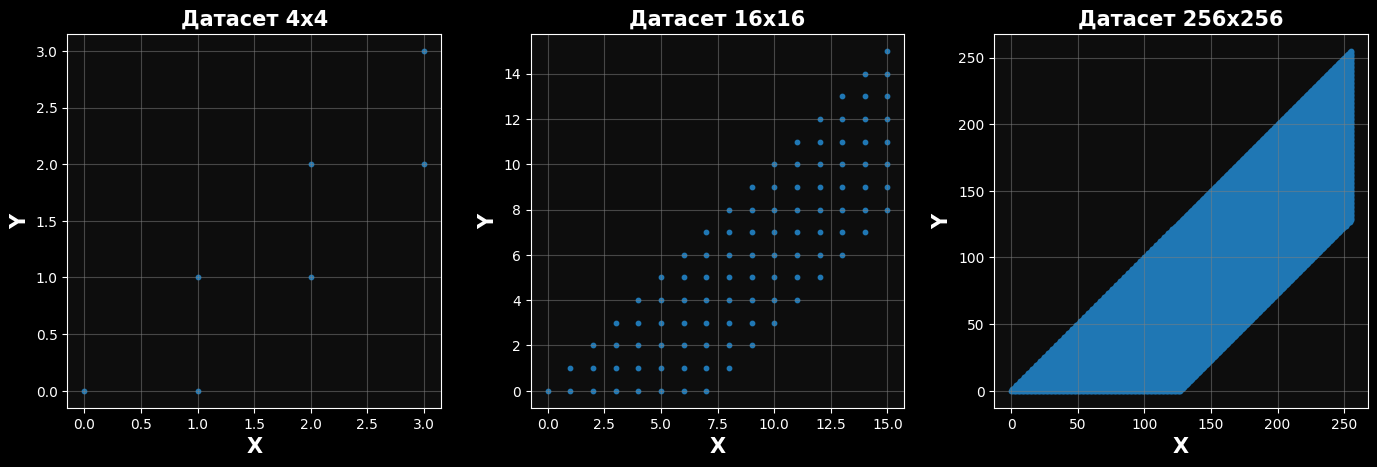

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания набора данных
def create_dataset(dimension, width):
    data = np.zeros((dimension, dimension))
    for row in range(dimension):
        col_start = row
        col_end = min(dimension, col_start + width // 2)
        data[row, col_start:col_end] = 1
    return data

# Параметры для наборов данных
a_list = [4, 16, 256]
labels = [f"Датасет {a}x{a}" for a in a_list]

# Построение наборов данных в словарь
df_a_dict = {f"df_{a}": create_dataset(a, a) for a in a_list}

# Отображение наборов данных точками
plt.figure(figsize=(14, 4.5))

for i, (key, df) in enumerate(df_a_dict.items(), start=1):
    plt.subplot(1, 3, i)
    # Получаем индексы, где значения равны 1 (т.е. позиции точек)
    y, x = np.where(df == 1)
    plt.scatter(x, y, s=10)
    plt.title(labels[i - 1])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().set_aspect('equal', adjustable='box')  # Равные масштабы осей

plt.tight_layout()
plt.show()


2.

Processing df_4 with shape (4, 4)...


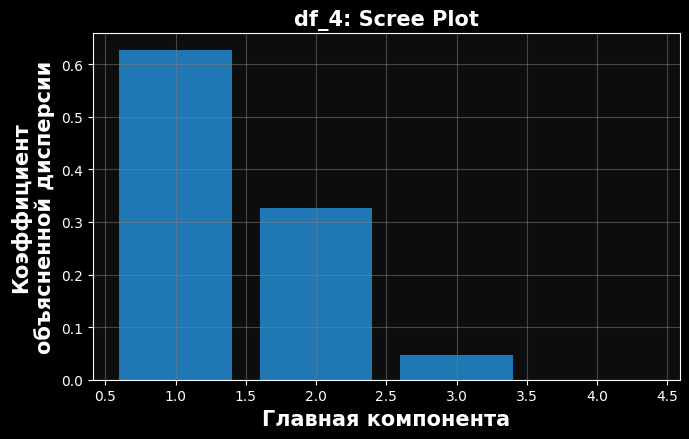

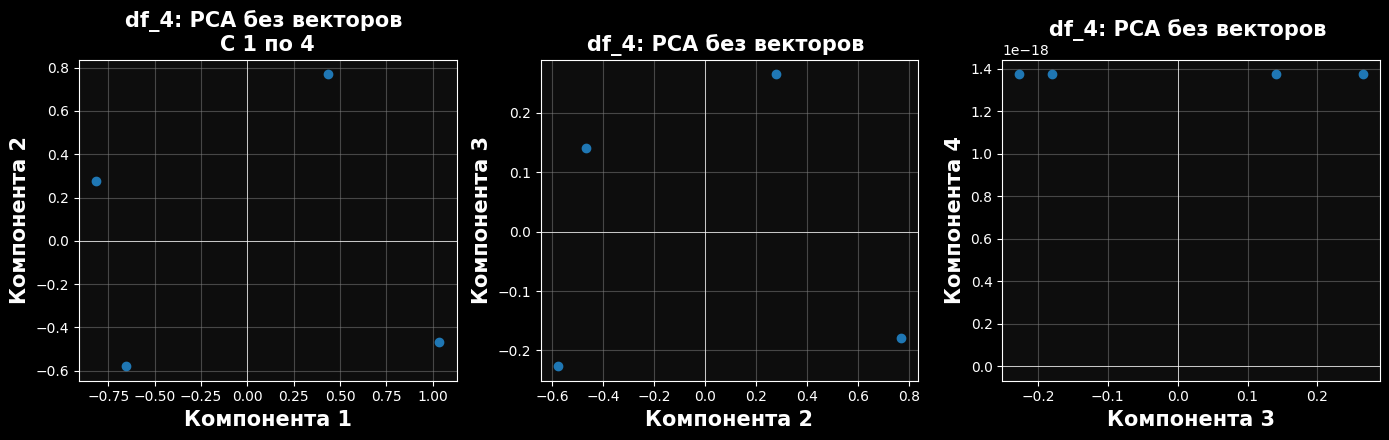

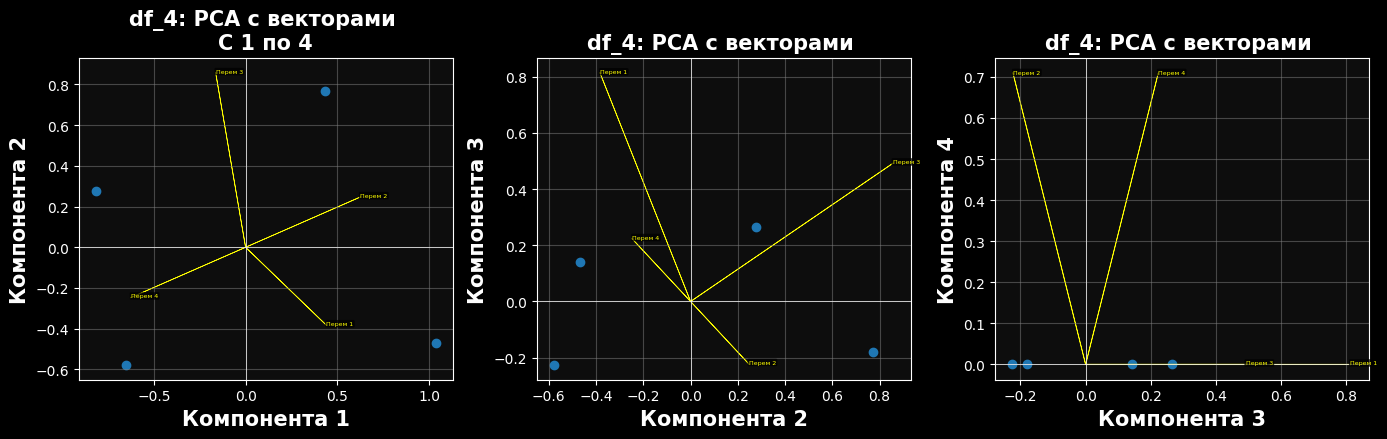

Processing df_16 with shape (16, 16)...


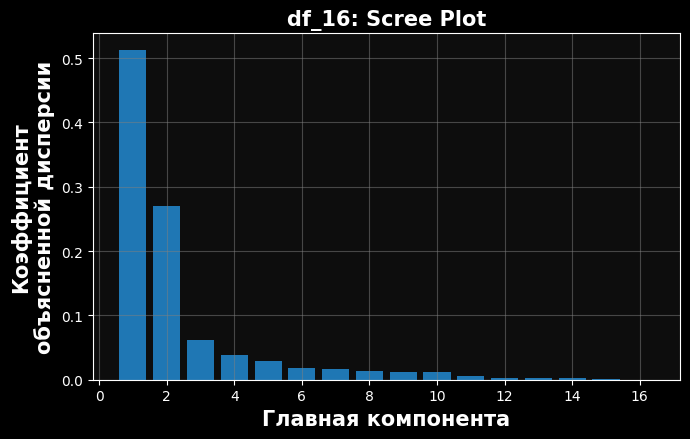

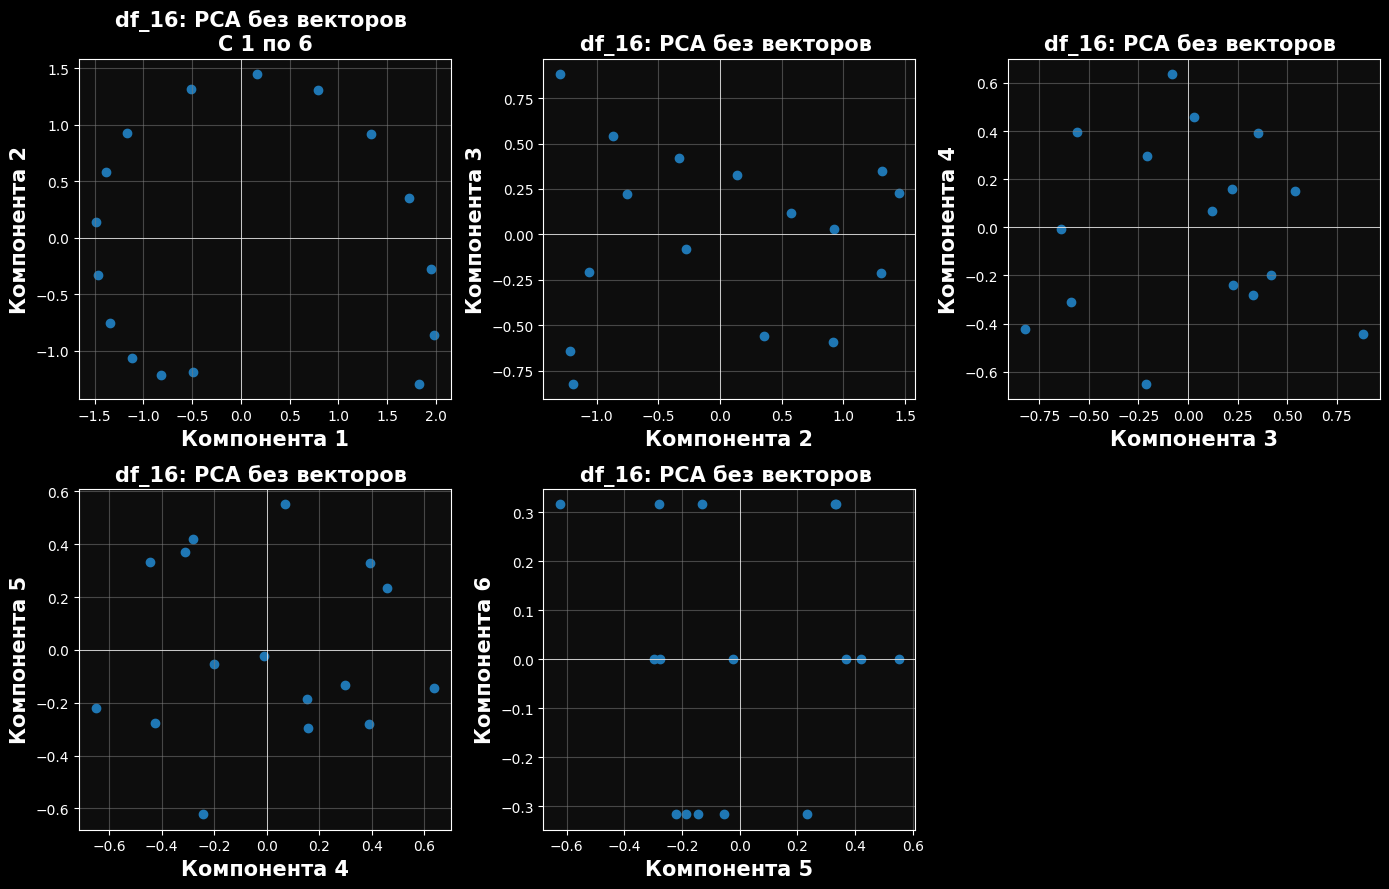

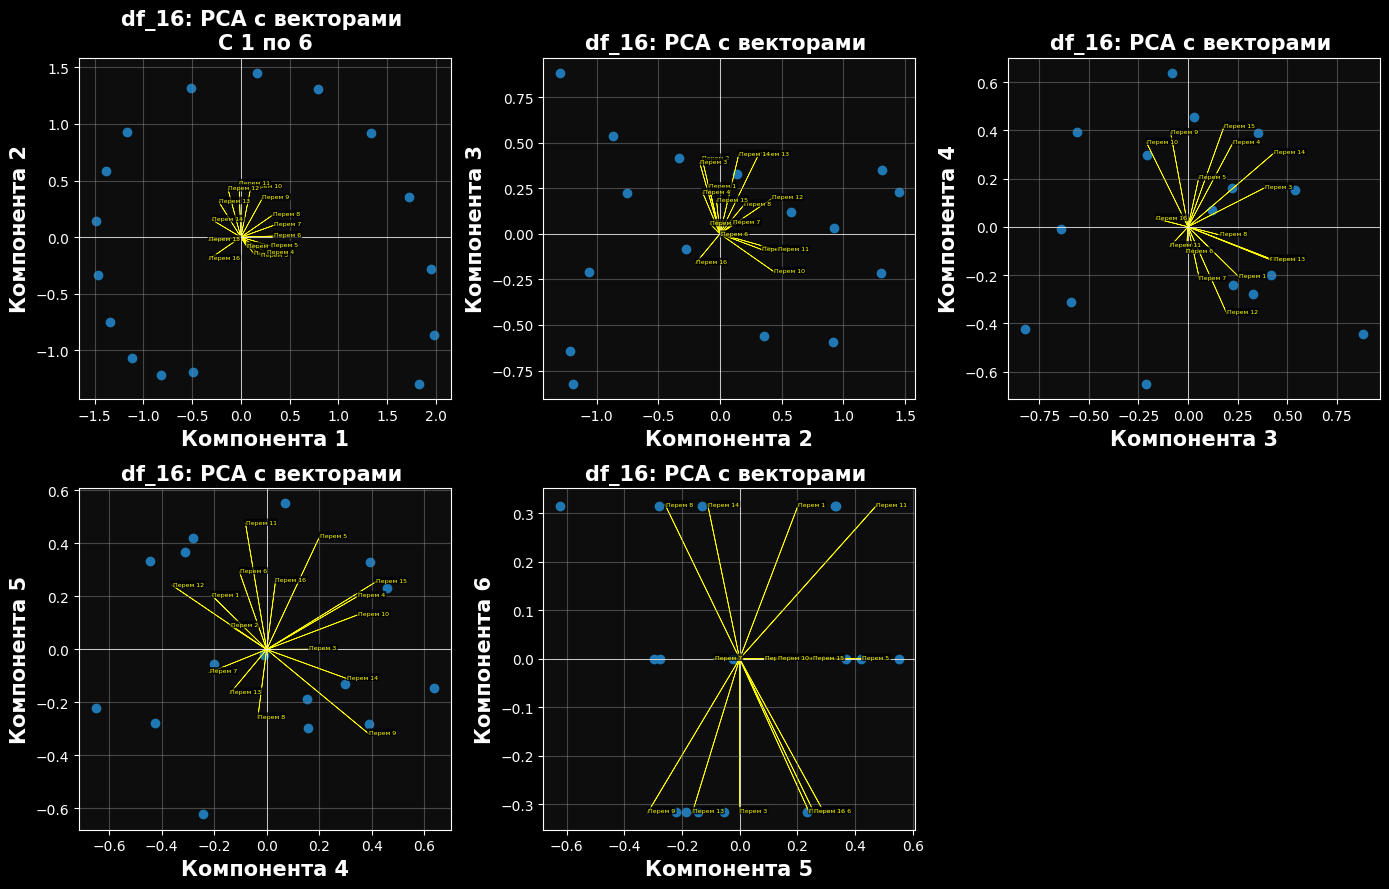

Processing df_256 with shape (256, 256)...


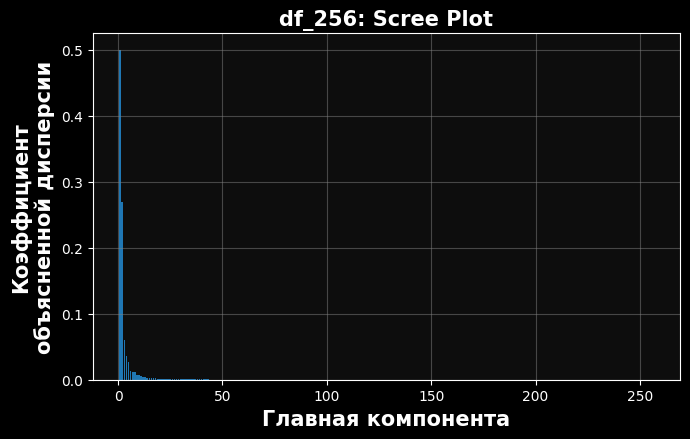

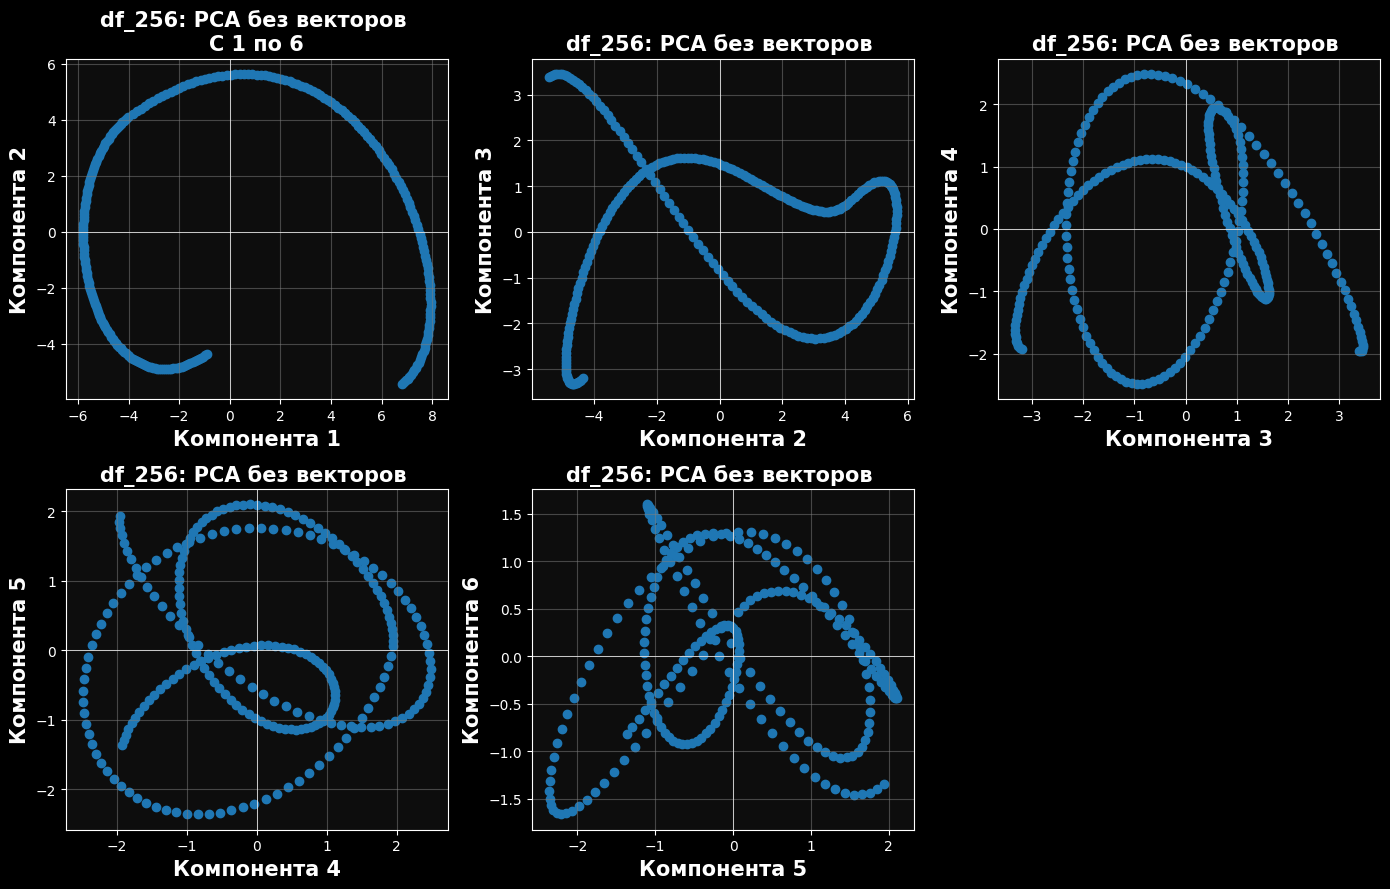

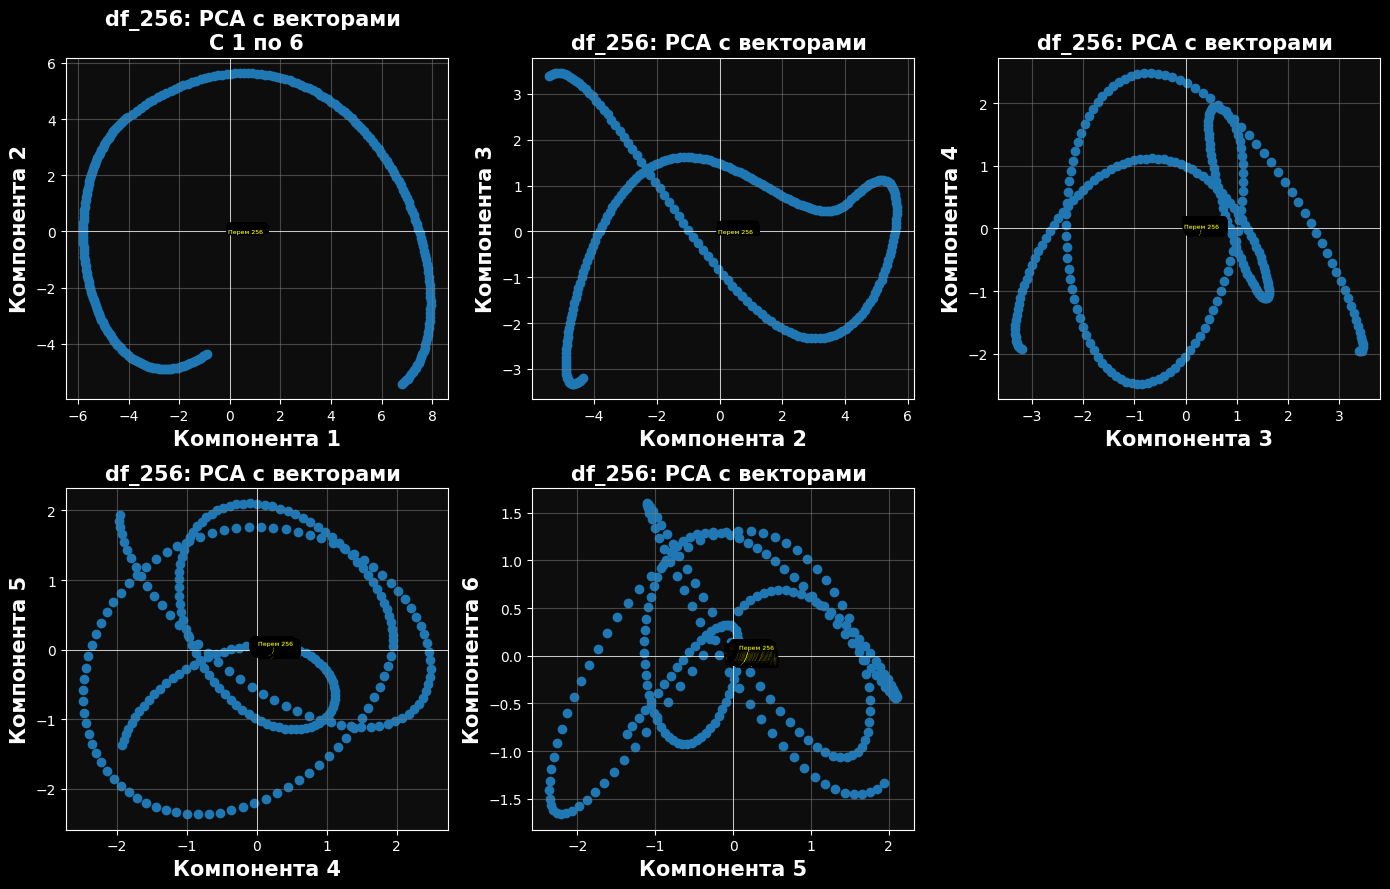

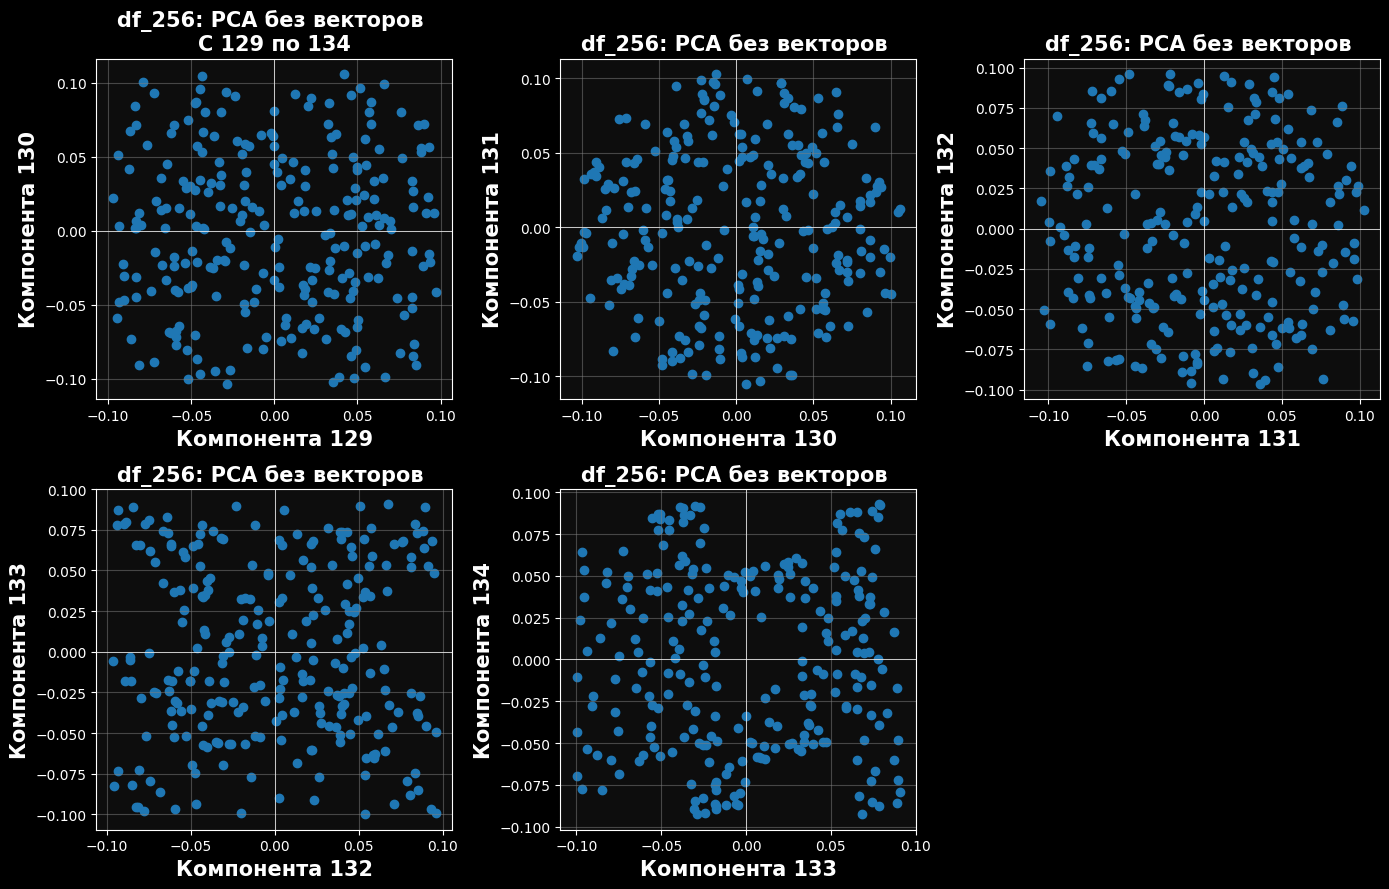

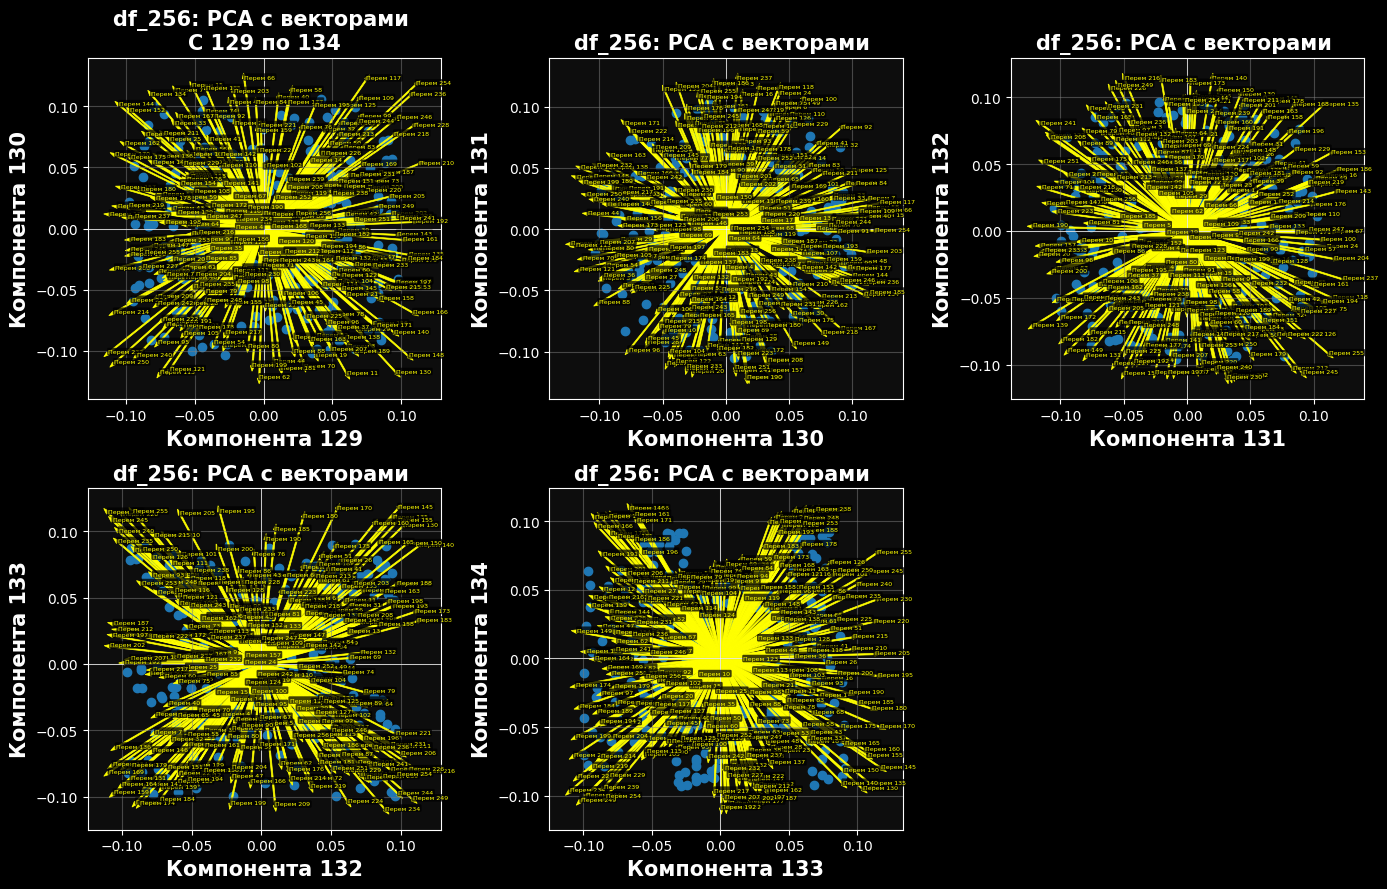

In [78]:
import matplotlib.pyplot as plt
import math

from sklearn.decomposition import PCA


# Функция для построения Scree plot
def plot_scree(data, ax, title):
  pca = PCA()
  pca.fit(data)
  explained_variance = pca.explained_variance_ratio_
  ax.bar(range(1, len(explained_variance) + 1), explained_variance)
  ax.set_title(title)
  ax.set_xlabel('Главная компонента')
  ax.set_ylabel('Коэффициент\nобъясненной дисперсии')

# Функция для визуализации PCA
def visualize_pca(data, a, title, c=0, show_vectors=False):
    n_components = min(a + c, min(data.shape))
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)

    n_graphs = a - 1
    n_cols = 3
    n_rows = math.ceil(n_graphs / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4.5 * n_rows))
    axs = axs.flatten()

    for i, cs in enumerate(range(c, c + n_graphs)):
      need_str = ''
      if i == 0 and c == 0:
        need_str = f'\nC {1} по {a}'
      elif i == 0 and c > 0:
        need_str = f'\nC {c + 1} по {a + c}'
      
      ax = axs[i]
      ax.scatter(transformed_data[:, cs], transformed_data[:, cs + 1])

      if show_vectors:
        # Проекция исходных переменных
        for j, vector in enumerate(pca.components_.T):
          ax.arrow(0, 0, vector[cs], vector[cs + 1], color="yellow", linewidth=0.5)
          ax.text(vector[cs], vector[cs + 1], f'Перем {j + 1}', color="yellow", fontsize=lit_fontsize/2,
                  bbox=dict(facecolor=fig_color, edgecolor='none', boxstyle='round,pad=0.2', alpha=0.75))

      ax.set_title(f'{title} {need_str}')
      ax.set_xlabel(f'Компонента {cs + 1}')
      ax.set_ylabel(f'Компонента {cs + 2}')
      ax.axhline(0, color="white", linewidth=0.5)
      ax.axvline(0, color="white", linewidth=0.5)

    # Скрытие пустых осей, если графиков меньше, чем мест в сетке
    for i in range(n_graphs, len(axs)):
      fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()
    

# Параметры для визуализации
a = 6
adj_a_values = {key: min(a, min(data.shape)) for key, data in df_a_dict.items()}
adj_c_values = {key: 0 if size[0] <= 128 else 128 for key, size in [(key, data.shape) for key, data in df_a_dict.items()]}

# Генерация графиков
for key, dataset in df_a_dict.items():
  size = dataset.shape
  adjusted_a = adj_a_values[key]
  adjusted_c = adj_c_values[key]
  
  print(f"Processing {key} with shape {size}...")
  
  # Scree plot
  fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
  plot_scree(dataset, ax, f"{key}: Scree Plot")
  plt.tight_layout()
  plt.show()

# Визуализация (1 до a)
  visualize_pca(dataset, a=adjusted_a, title=f'{key}: PCA без векторов', show_vectors=False)
  visualize_pca(dataset, a=adjusted_a, title=f'{key}: PCA с векторами', show_vectors=True)

  # Визуализация (c до c + a), если adjusted_c > 0
  if adjusted_c > 0:
    visualize_pca(dataset, a=adjusted_a, title=f'{key}: PCA без векторов', c=adjusted_c, show_vectors=False)
    visualize_pca(dataset, a=adjusted_a, title=f'{key}: PCA с векторами', c=adjusted_c, show_vectors=True)


3.

Running UMAP with dataset df_4 of shape (4, 4)...


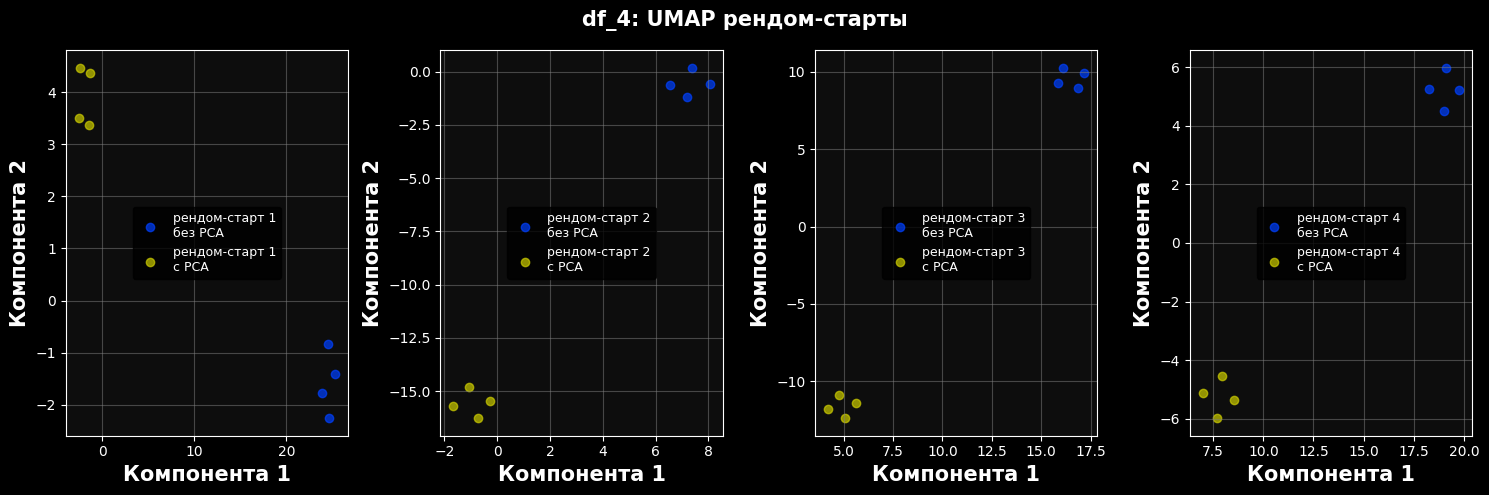

Running UMAP with dataset df_16 of shape (16, 16)...


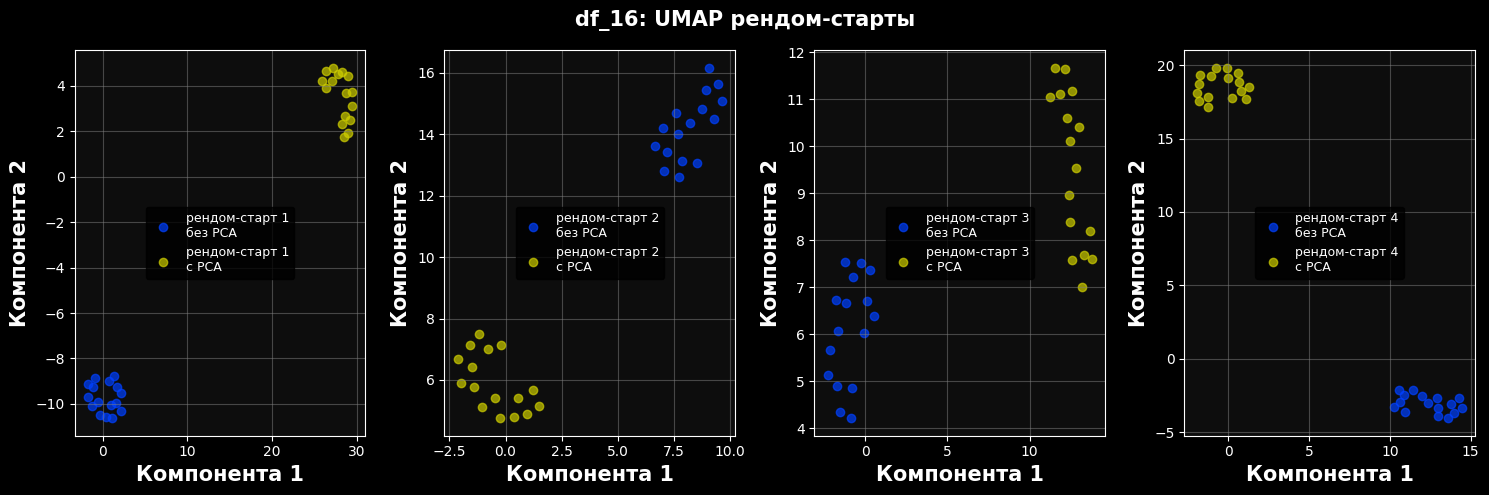

Running UMAP with dataset df_256 of shape (256, 256)...


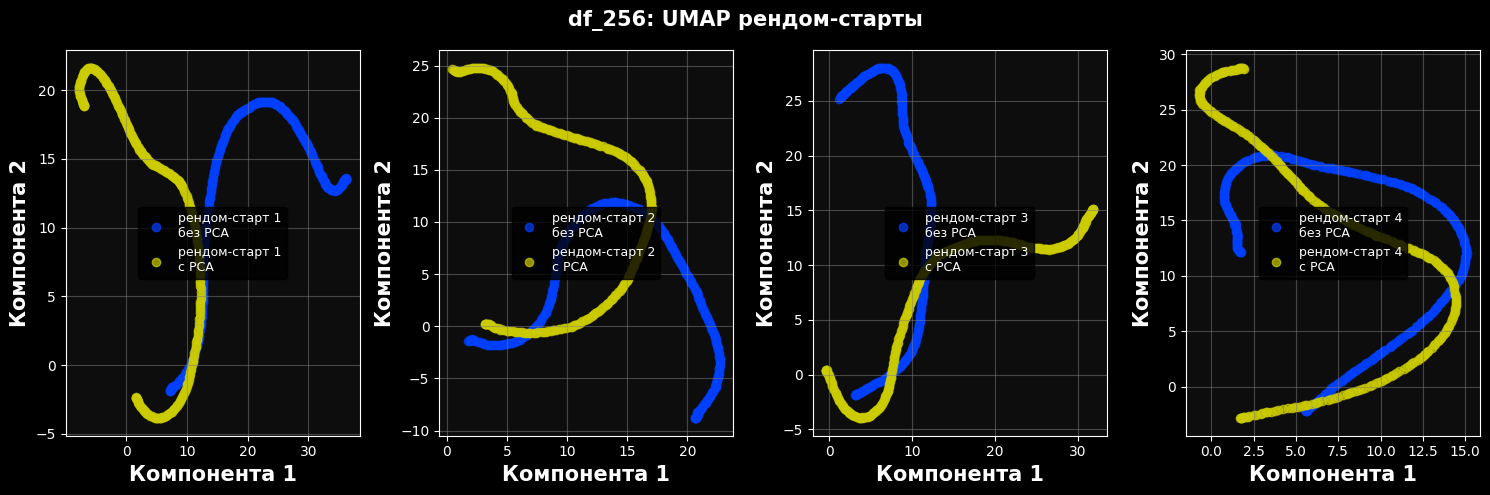

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap
import warnings

# Отключение предупреждений UMAP
warnings.filterwarnings('ignore', category=UserWarning, module='umap')


# Общая функция для визуализации проекций
def visualize_projections(ax, transformed_data, label, color=np.array([0.0, 0.0, 0.0])):
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.7, color=color, label=label)
    ax.set_xlabel('Компонента 1')
    ax.set_ylabel('Компонента 2')


# Функция для выполнения UMAP с несколькими случайными стартами
def umap_random_starts(data, dataset_name, n_starts=4):
    
    # Создание подграфиков
    fig, axes = plt.subplots(1, n_starts, figsize=(15, 5))
    fig.suptitle(f'{dataset_name}: UMAP рендом-старты', fontsize=title_fontsize, color=font_color, weight='bold')
    
    for i in range(n_starts):
        umap_model = umap.UMAP(n_components=2, random_state=i)
        umap_result = umap_model.fit(data)

        # Визуализация без PCA
        visualize_projections(axes[i], umap_result.embedding_, f"рендом-старт {i+1}\nбез PCA", color=blue_color)

        # Применяем PCA перед UMAP
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)

        umap_model = umap.UMAP(n_components=2, random_state=i)
        umap_result = umap_model.fit(transformed_data)

        # Визуализация с PCA
        visualize_projections(axes[i], umap_result.embedding_, f"рендом-старт {i+1}\nс PCA", color=yellow_color)

        # Добавление легенды
        axes[i].legend(loc='center')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Чтобы название не накладывалось на графики
    plt.show()

# Выполнение UMAP для всех созданных наборов данных
for dataset_name, dataset in df_a_dict.items():
    print(f"Running UMAP with dataset {dataset_name} of shape {dataset.shape}...")
    umap_random_starts(dataset, dataset_name, n_starts=4)


Running t-SNE with dataset df_4 of shape (4, 4)...


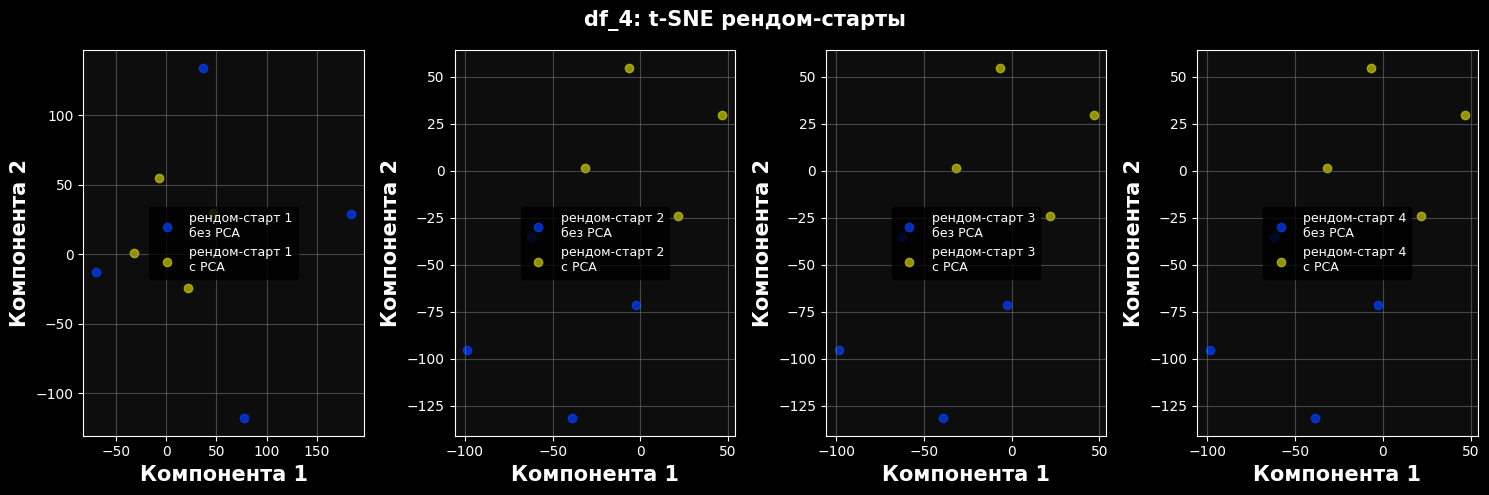

Running t-SNE with dataset df_16 of shape (16, 16)...


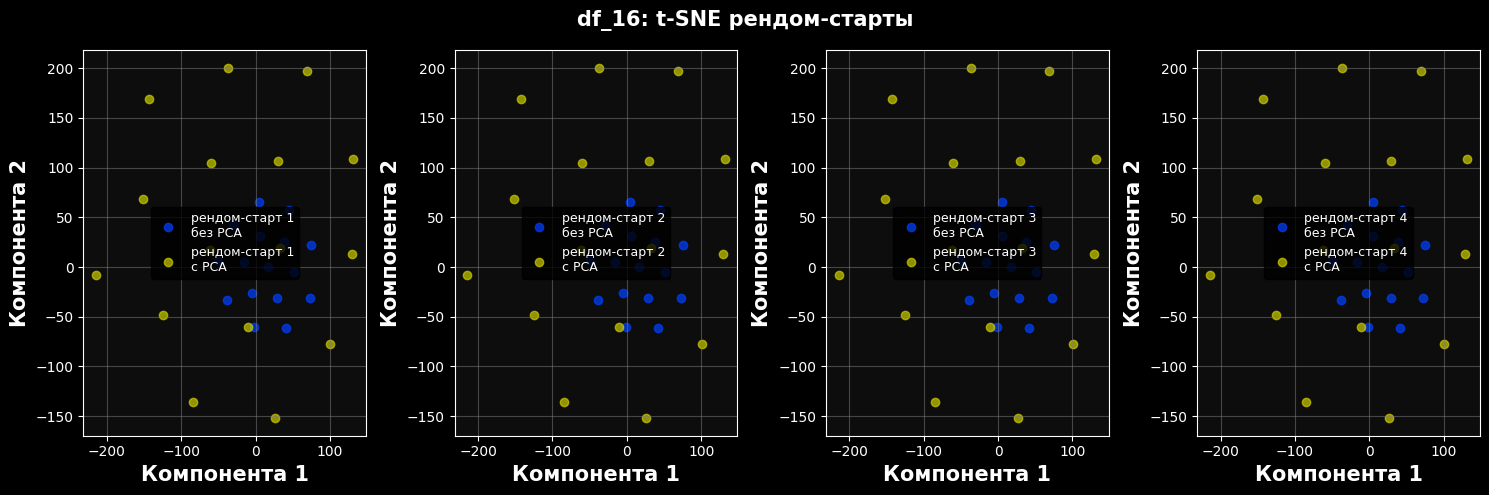

Running t-SNE with dataset df_256 of shape (256, 256)...


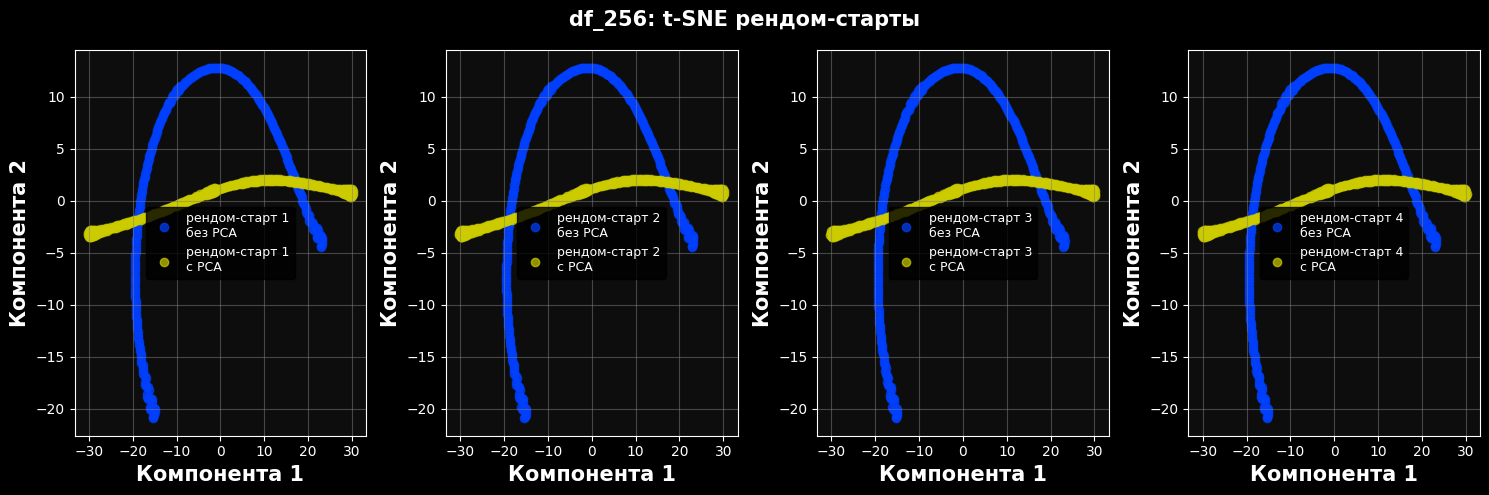

In [80]:
from sklearn.manifold import TSNE

# Функция для выполнения t-SNE с несколькими случайными стартами
def tsne_random_starts(data, dataset_name, n_starts=4):
    # Создание подграфиков
    fig, axes = plt.subplots(1, n_starts, figsize=(15, 5))
    fig.suptitle(f'{dataset_name}: t-SNE рендом-старты', fontsize=title_fontsize, color=font_color, weight='bold')
    
    n_samples = data.shape[0]
    perplexity_value = 25 if n_samples - 1 > 25 else n_samples - 1

    for i in range(n_starts):
        # t-SNE без PCA с уникальным random_state
        tsne_model = TSNE(n_components=2, random_state=i, perplexity=perplexity_value)  # Уникальный random_state
        tsne_result = tsne_model.fit_transform(data)
        visualize_projections(axes[i], tsne_result, f"рендом-старт {i+1}\nбез PCA", color=blue_color)

        # Применяем PCA перед t-SNE
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)

        # t-SNE с PCA с уникальным random_state
        tsne_model = TSNE(n_components=2, random_state=i, perplexity=perplexity_value)  # Уникальный random_state
        tsne_result = tsne_model.fit_transform(transformed_data)
        visualize_projections(axes[i], tsne_result, f"рендом-старт {i+1}\nс PCA", color=yellow_color)

        # Добавление легенды
        axes[i].legend(loc='center')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Чтобы название не накладывалось на графики
    plt.show()

# Пример работы с t-SNE для всех созданных наборов данных
for dataset_name, dataset in df_a_dict.items():
    print(f"Running t-SNE with dataset {dataset_name} of shape {dataset.shape}...")
    tsne_random_starts(dataset, dataset_name, n_starts=4)

Running PacMap with dataset df_4 of shape (4, 4)...
Для таких низких значений метод крашится.

Running PacMap with dataset df_16 of shape (16, 16)...


Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.
Sample size cannot accommodate number of further pairs requested. n_FP will be reduced.


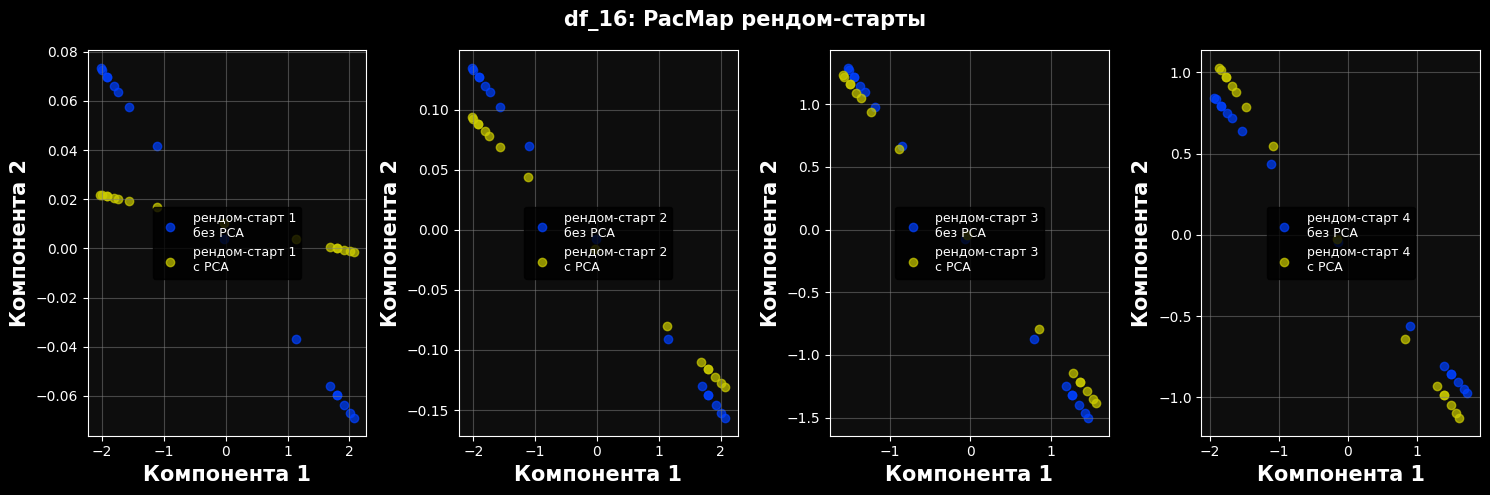

Running PacMap with dataset df_256 of shape (256, 256)...


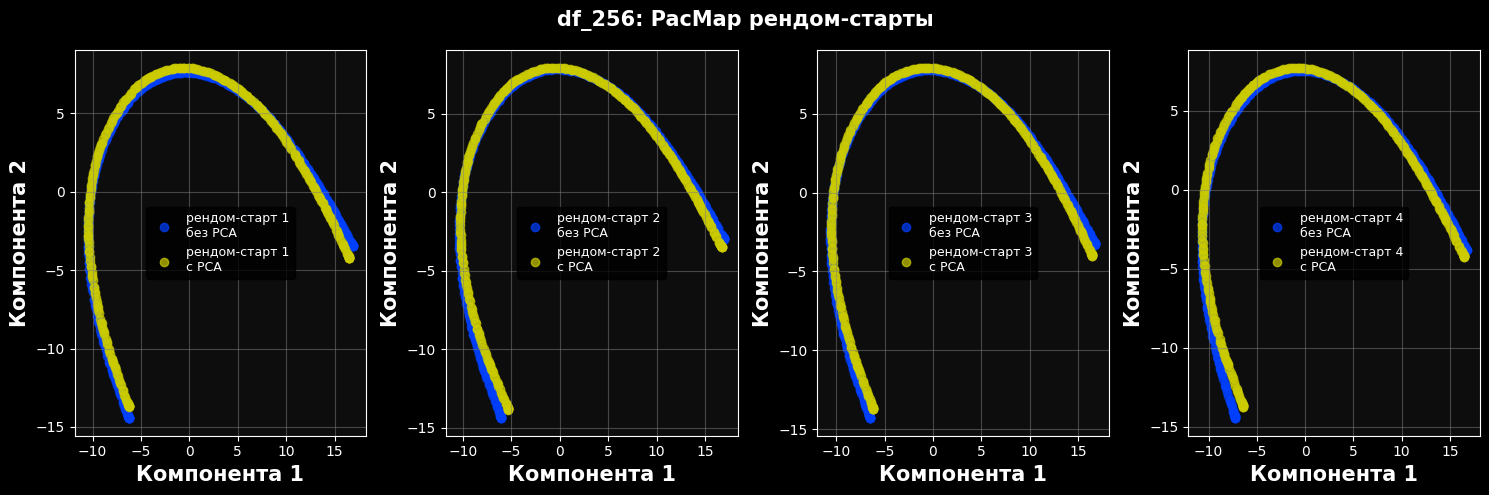

In [81]:
import pacmap
import time

# Функция для выполнения PacMap с несколькими случайными стартами
def pacmap_random_starts(data, dataset_name, n_starts=4):
    # Создание подграфиков
    fig, axes = plt.subplots(1, n_starts, figsize=(15, 5))
    fig.suptitle(f'{dataset_name}: PacMap рендом-старты', fontsize=title_fontsize, color=font_color, weight='bold')
    
    n_samples = data.shape[0]
    n_neighbors = min(10, n_samples // 2)

    for i in range(n_starts):
        # PacMap без PCA с уникальным random_state
        pacmap_model = pacmap.PaCMAP(n_components=2, random_state=i, n_neighbors=n_neighbors, MN_ratio=0.5, FP_ratio=2.0)
        pacmap_result = pacmap_model.fit_transform(data)
        visualize_projections(axes[i], pacmap_result, f"рендом-старт {i+1}\nбез PCA", color=blue_color)
        
        # Применяем PCA перед PacMap
        pca = PCA(n_components=2)
        transformed_data = pca.fit_transform(data)

        # PacMap с PCA с уникальным random_state
        pacmap_result = pacmap_model.fit_transform(transformed_data)
        visualize_projections(axes[i], pacmap_result, f"рендом-старт {i+1}\nс PCA", color=yellow_color)

        # Добавление легенды
        axes[i].legend(loc='center')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Чтобы название не накладывалось на графики
    plt.show()

# Пример работы с PacMap для всех созданных наборов данных
for dataset_name, dataset in df_a_dict.items():
    print(f"Running PacMap with dataset {dataset_name} of shape {dataset.shape}...")
    time.sleep(0.5)
    if dataset.shape[0] > 10:
        pacmap_random_starts(dataset.reshape(dataset.shape[0], -1), dataset_name, n_starts=4)
    else:
        print("Для таких низких значений метод крашится.\n")
        time.sleep(0.5)

4.

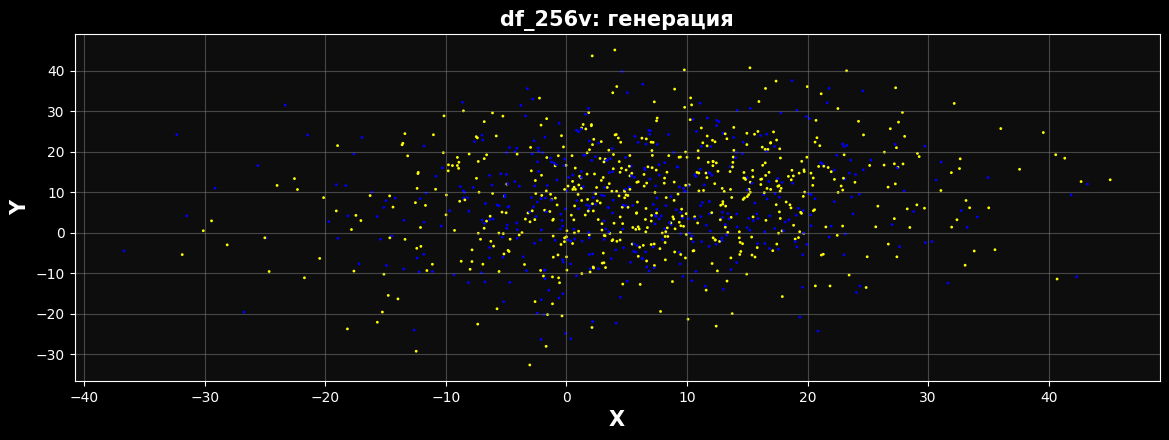

In [82]:
from sklearn.datasets import make_blobs

def generate_df_a_v(df, n_points=10, d=(5, 20)):
    a = df.shape[0]
    df_v = []

    for x in range(a):
        for y in range(a):
            if df[x][y] == 1:
                class_label = np.random.choice([0, 1])
                X, _ = make_blobs(n_samples=n_points, centers=[(x, y)], cluster_std=d, n_features=2)

                labels = np.full((n_points, 1), class_label)

                df_v.append(np.hstack((X, labels)))

    # Объединение всех точек в один массив
    df_v = np.vstack(df_v)

    return df_v

# Генерация датасета
n_points = 10
my_d = 12
df_256 = df_a_dict['df_16']
df_256v = generate_df_a_v(df_256, n_points=n_points, d=my_d)

# Визуализация
plt.figure(figsize=(14, 4.5))
plt.scatter(df_256v[:, 0], df_256v[:, 1], c=df_256v[:, 2], cmap=cmap, s=1)
plt.title('df_256v: генерация')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


5.

Processing df_256 with shape (1000, 3)...


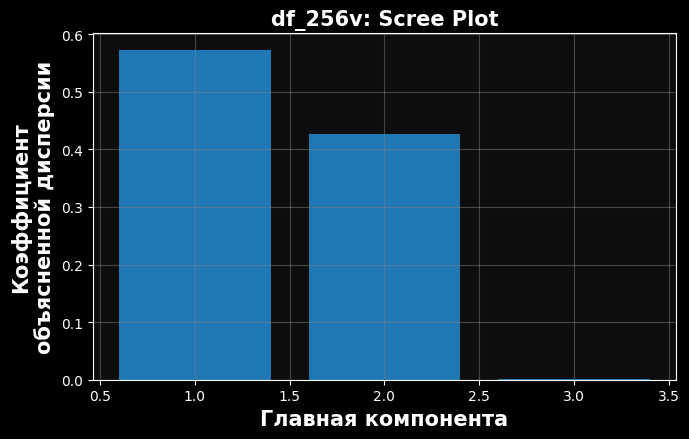

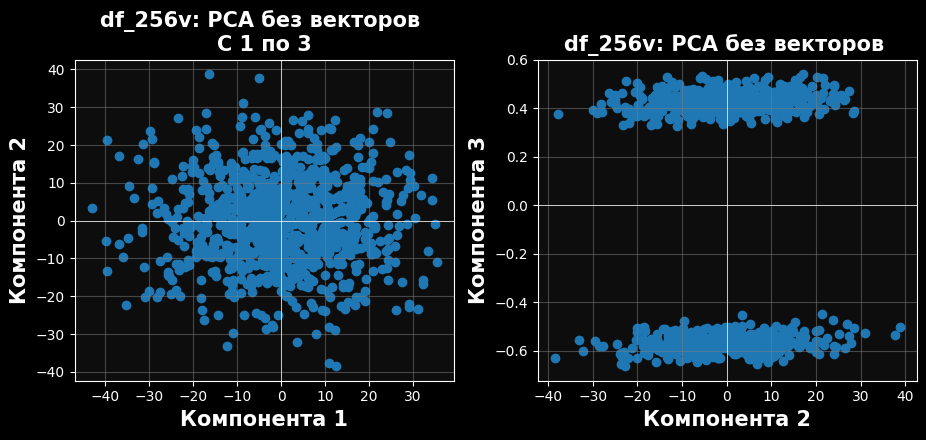

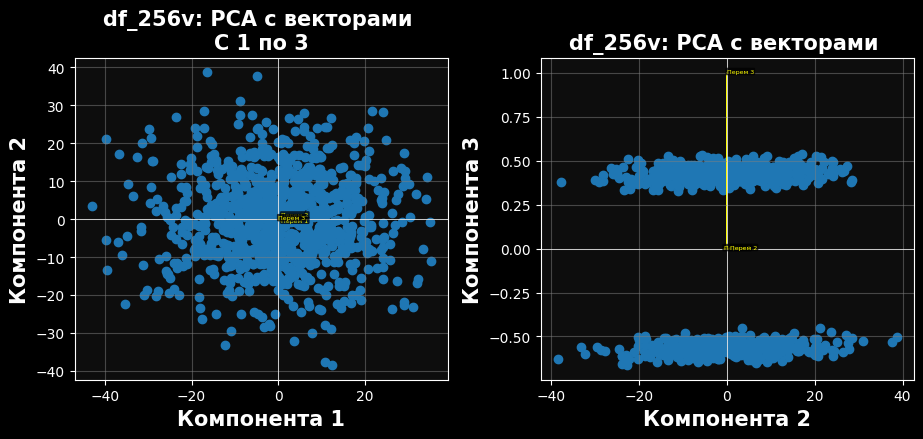

In [83]:
size = df_256v.shape

# Рассчитываем adjusted_a и adjusted_c для выбранного датасета
a = 6
adjusted_a = min(a, min(size))  # Минимум из a и размерности данных
adjusted_c = 0 if size[0] <= 128 else 128  # Логика для adjusted_c

print(f"Processing {key} with shape {size}...")

# Scree plot
dataset_name = 'df_256v'
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
plot_scree(df_256v, ax, f"{dataset_name}: Scree Plot")
plt.tight_layout()
plt.show()

# Визуализация (1 до a)
visualize_pca(df_256v, a=adjusted_a, title=f'{dataset_name}: PCA без векторов', show_vectors=False)
visualize_pca(df_256v, a=adjusted_a, title=f'{dataset_name}: PCA с векторами', show_vectors=True)

6.

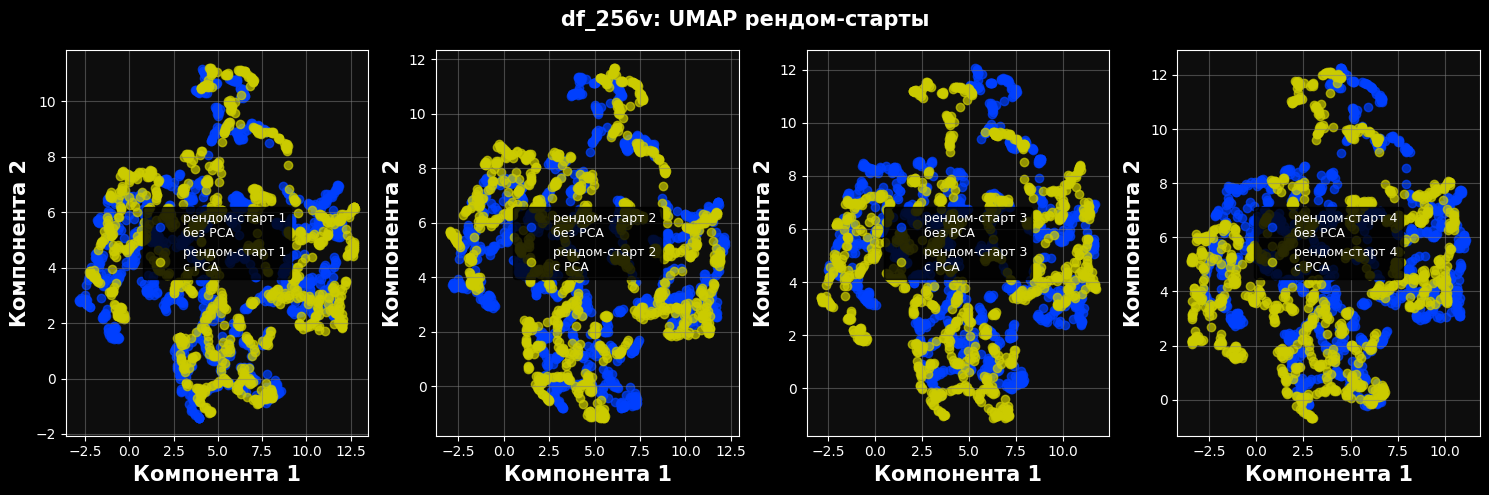

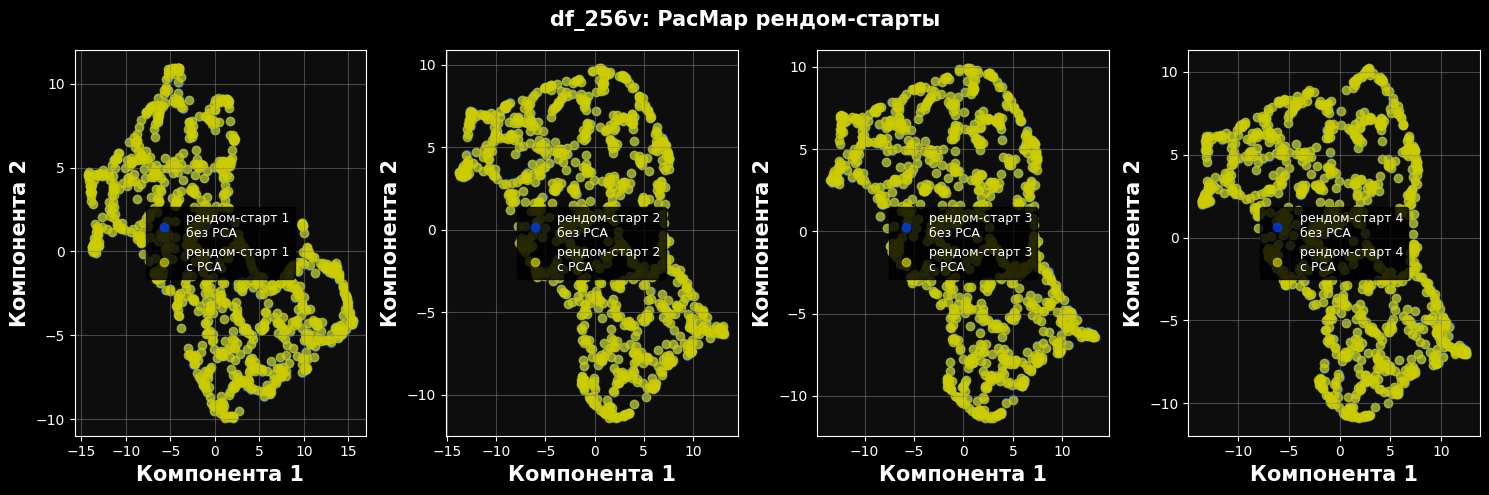

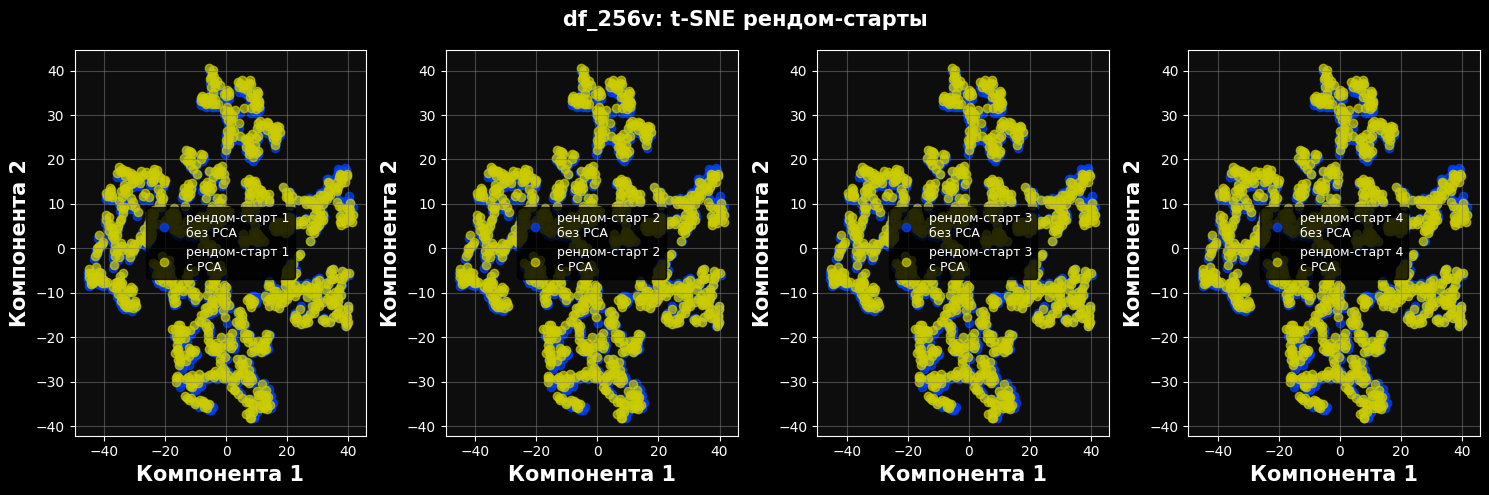

In [84]:
# Применение UMAP, t-SNE и PACMap для нового датасета
umap_random_starts(df_256v, dataset_name, n_starts=4)
pacmap_random_starts(df_256v, dataset_name, n_starts=4)
tsne_random_starts(df_256v, dataset_name, n_starts=4)

7.


Full describe:                year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.9440

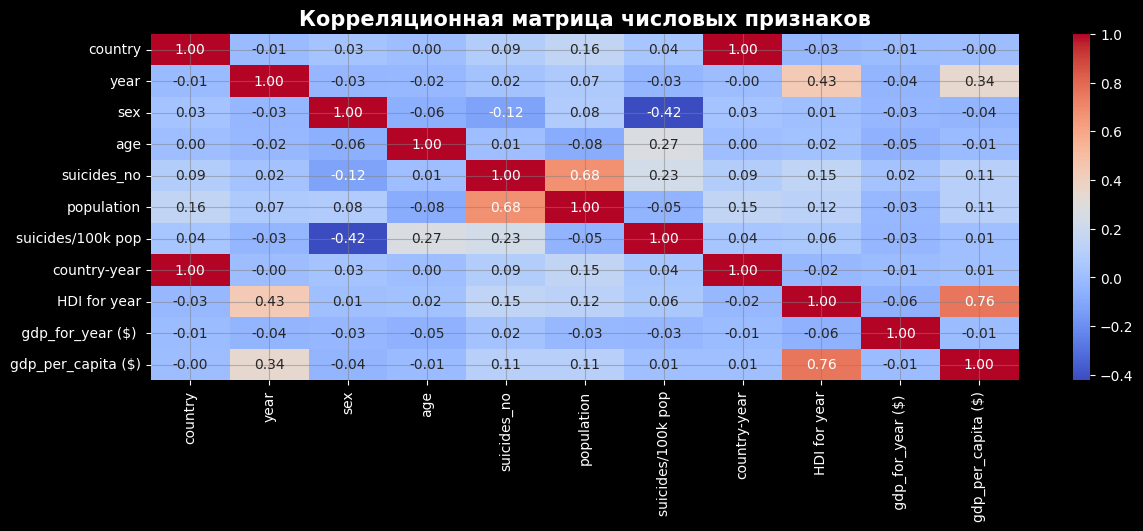

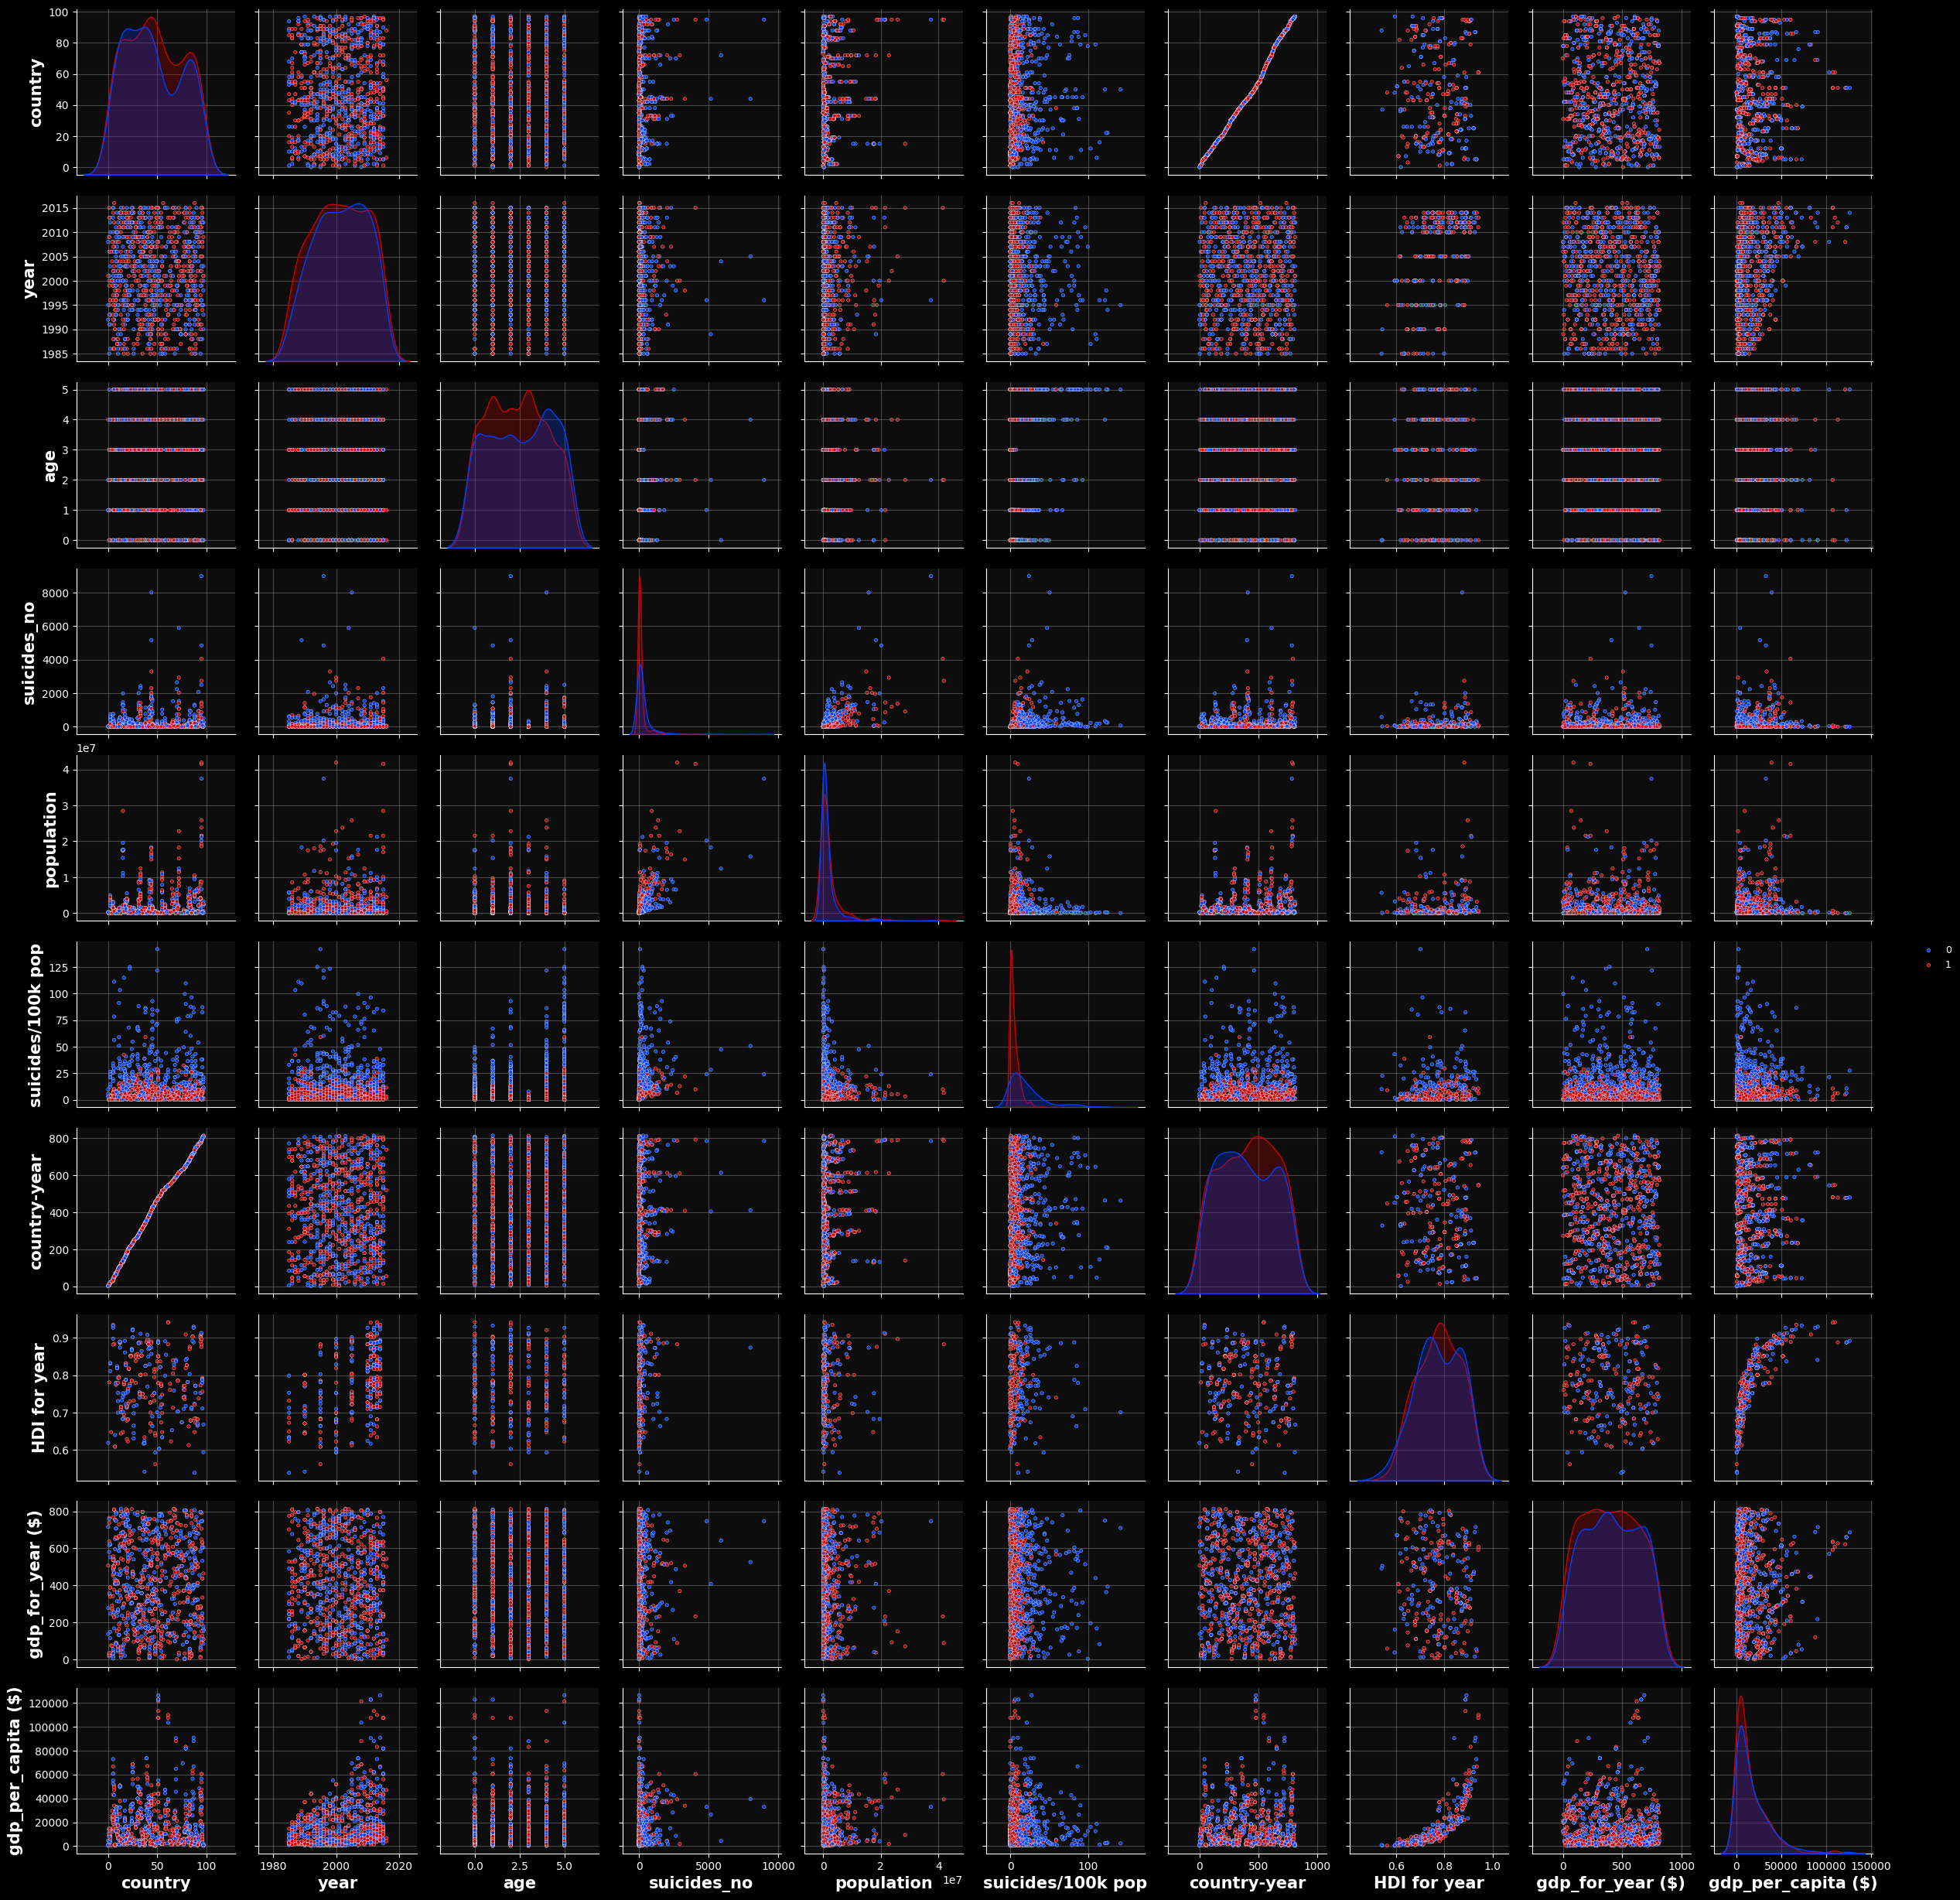

In [85]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df_kaggle = pd.read_csv('suicide.csv')
df_kaggle = df_kaggle.iloc[:, :11]

# Информация о данных
print(f'\nFull describe: {df_kaggle.describe()}')

# Преобразуем 'sex' в таргет (0 - male, 1 - female)
df_kaggle['sex'] = df_kaggle['sex'].map({'male': 0, 'female': 1})
target = 'sex'

# Берем только n строк
df_kaggle = df_kaggle.sample(n=1000, random_state=215)

# Закодируем остальные строковые значения
label_encoders = {}  # Для сохранения маппинга
for column in df_kaggle.select_dtypes(include=['object']).columns:
    if column != target:  # Не трогаем уже преобразованный таргет
        le = LabelEncoder()
        df_kaggle[column] = le.fit_transform(df_kaggle[column])
        label_encoders[column] = le

# Проверяем результат
print(f'\nHead: {df_kaggle.head()}')
print(f'\nShape: {df_kaggle.shape}')

corr_matrix = df_kaggle.corr()
plt.figure(figsize=(14, 4.5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

new_palette = [blue_color, red_color]
# print(new_palette)

sns.pairplot(df_kaggle, hue=target, diag_kind='kde', palette=new_palette, plot_kws={'alpha': 0.9, 's': 10})
plt.show()

8.

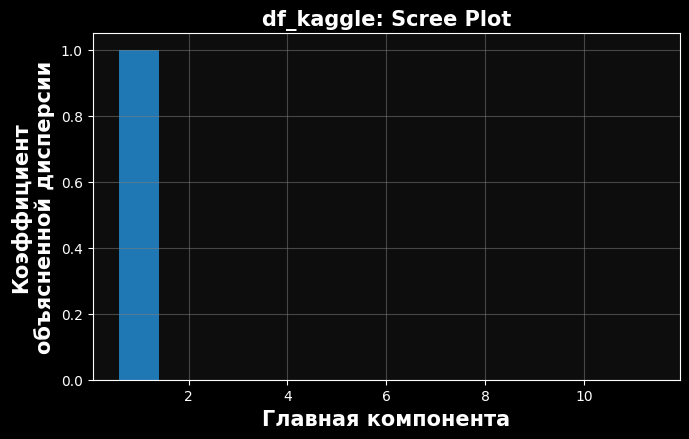

Количество компонентов по методу Кайзера: 9
Индексы компонент по методу Кайзера: [0, 1, 2, 3, 4, 5, 6, 7, 8]


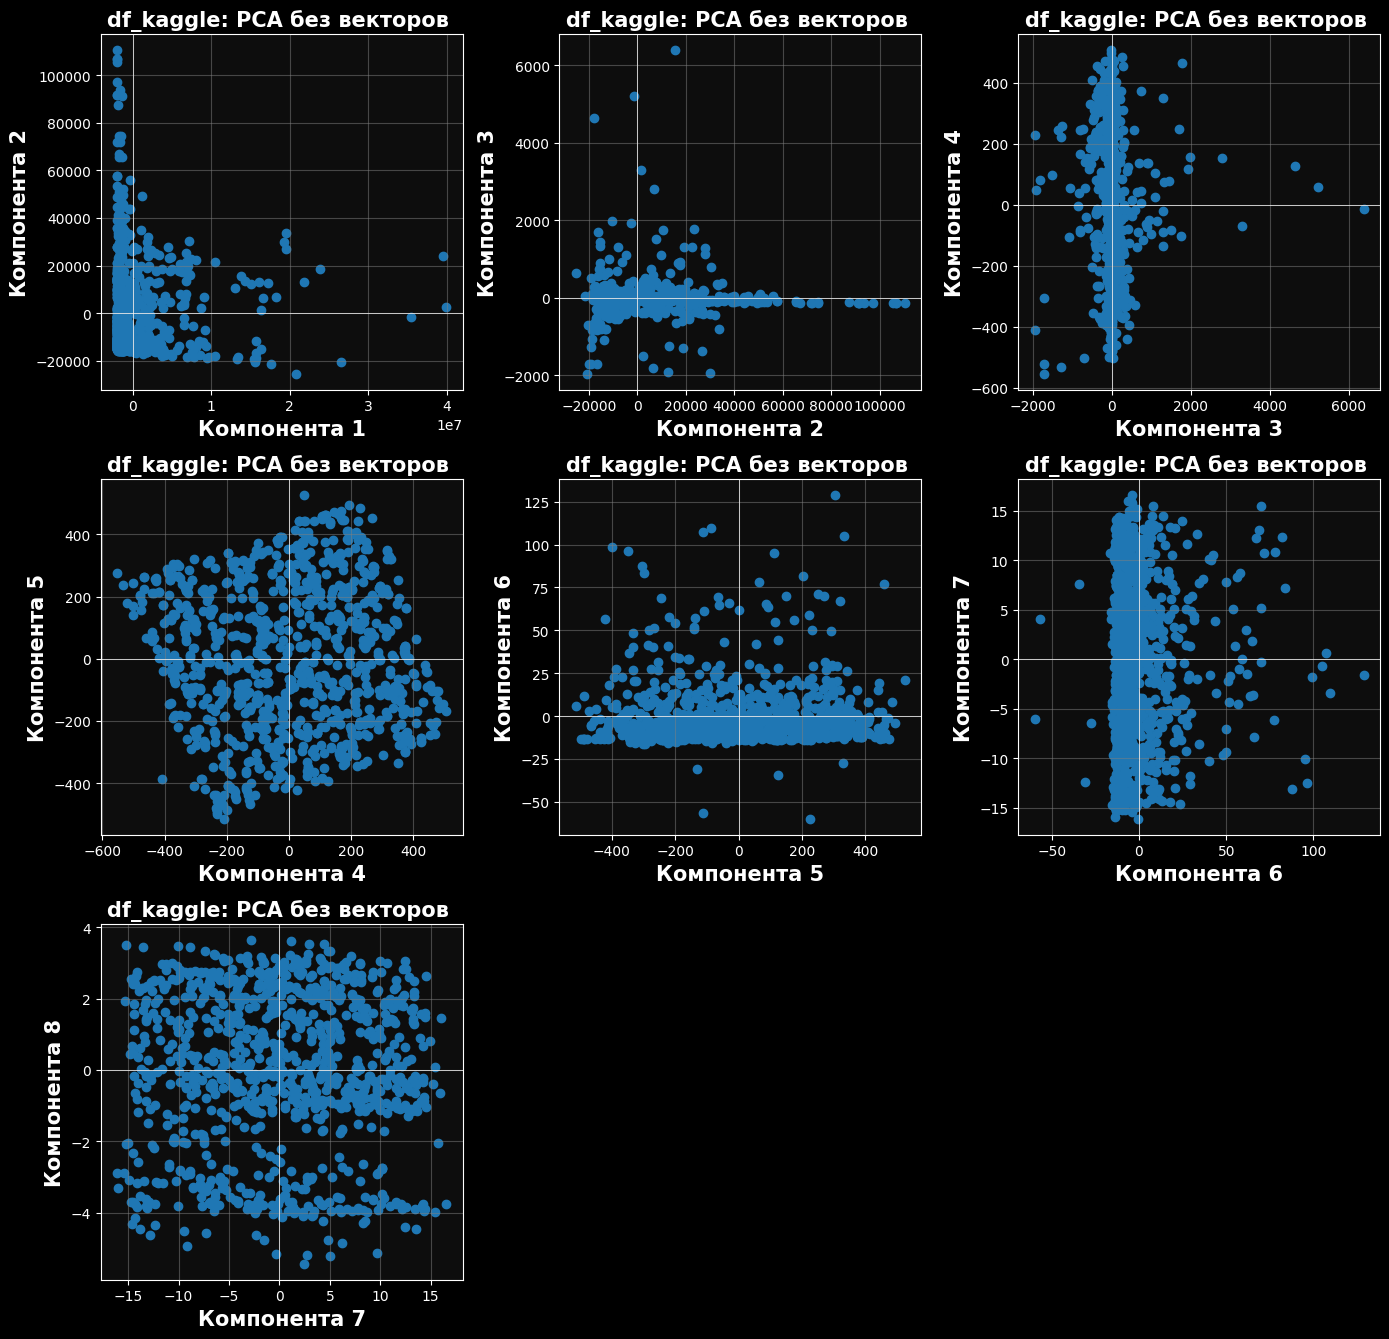

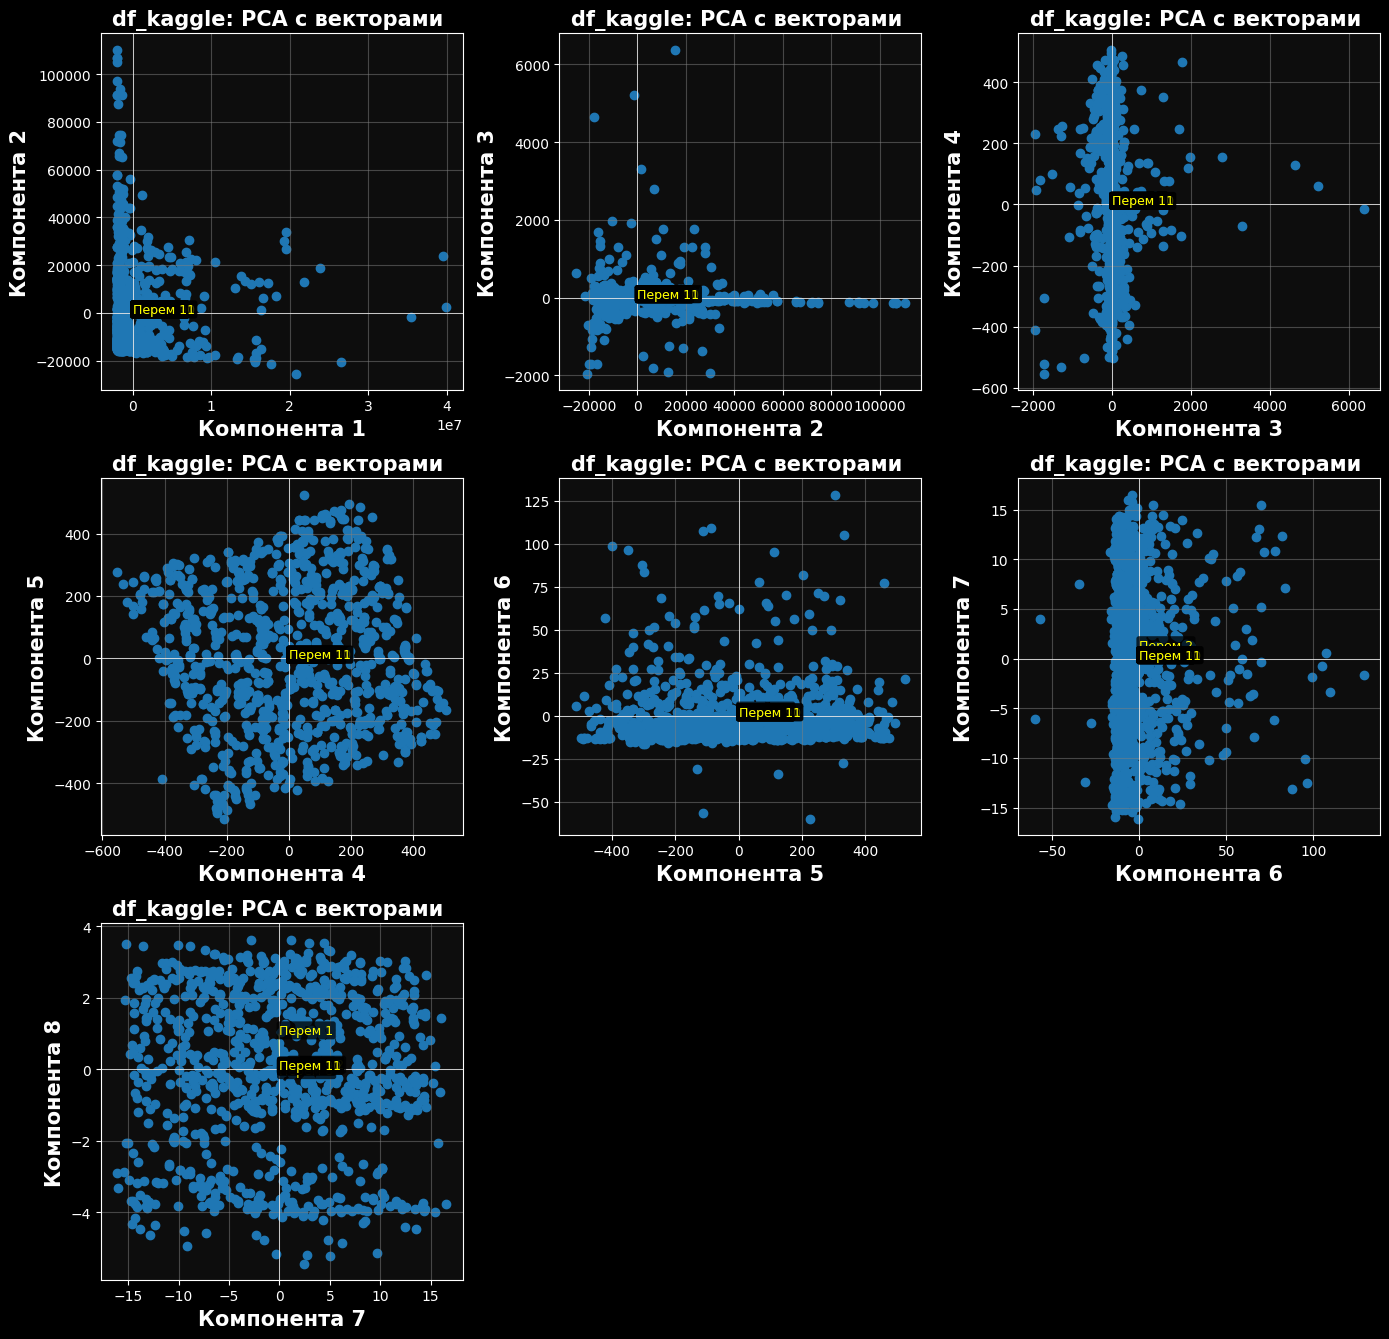

In [86]:
from sklearn.impute import SimpleImputer

# Функция для визуализации PCA для выбранных компонент
def visualize_select_pca(data, selected_components, title, show_vectors=False):
    pca = PCA(n_components=len(selected_components))
    transformed_data = pca.fit_transform(data)

    n_graphs = len(selected_components) - 1  # Пара компонент для графиков (по два компонента на график)
    n_cols = 3
    n_rows = math.ceil(n_graphs / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 4.5 * n_rows))
    axs = axs.flatten()

    max_component = transformed_data.shape[1]

    for i in range(n_graphs):  # Мы получаем графики для n_graphs
        comp1 = selected_components[i]
        comp2 = selected_components[i + 1]

        if comp1 + 1 < max_component and comp2 + 1 < max_component:
            # need_str = f'\nC {comp1 + 1} и C {comp2 + 1}'
            need_str = ''

            ax = axs[i]
            ax.scatter(transformed_data[:, comp1], transformed_data[:, comp2])

            if show_vectors:
                # Проекция исходных переменных
                for j, vector in enumerate(pca.components_.T):
                    ax.arrow(0, 0, vector[comp1], vector[comp2], color="yellow", linewidth=0.5)
                    ax.text(vector[comp1], vector[comp2], f'Перем {j + 1}', color="yellow", fontsize=lit_fontsize,
                            bbox=dict(facecolor=fig_color, edgecolor='none', boxstyle='round,pad=0.2', alpha=0.75))

            ax.set_title(f'{title} {need_str}')
            ax.set_xlabel(f'Компонента {comp1 + 1}')
            ax.set_ylabel(f'Компонента {comp2 + 1}')
            ax.axhline(0, color="white", linewidth=0.5)
            ax.axvline(0, color="white", linewidth=0.5)

    # Удаляем лишние оси, если графиков меньше, чем места в сетке
    for i in range(n_graphs-1, len(axs)):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()


# Функция для применения метода Кайзера
def apply_kaiser_criterion(df):
    pca = PCA()
    pca.fit(df)
    eigenvalues = pca.explained_variance_                                        # Собственные значения
    selected_components = [i for i, val in enumerate(eigenvalues) if val > 1]    # Создаем список индексов компонент с eigenvalue > 1
    kaiser_components = len(selected_components)                                 # Количество компонент, удовлетворяющих методу Кайзера
    return selected_components, kaiser_components


imputer = SimpleImputer(strategy='mean')
df_kaggle = imputer.fit_transform(df_kaggle)

# Scree plot
dataset_name = 'df_kaggle'
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
plot_scree(df_kaggle, ax, f"{dataset_name}: Scree Plot")
plt.tight_layout()
plt.show()

selected_components, kaiser_components = apply_kaiser_criterion(df_kaggle)
print(f"Количество компонентов по методу Кайзера: {kaiser_components}")
print(f"Индексы компонент по методу Кайзера: {selected_components}")

# Визуализация PCA для компонентов, отобранных по методу Кайзера
visualize_select_pca(df_kaggle, selected_components, title=f'{dataset_name}: PCA без векторов', show_vectors=False)
visualize_select_pca(df_kaggle, selected_components, title=f'{dataset_name}: PCA с векторами', show_vectors=True)

9.

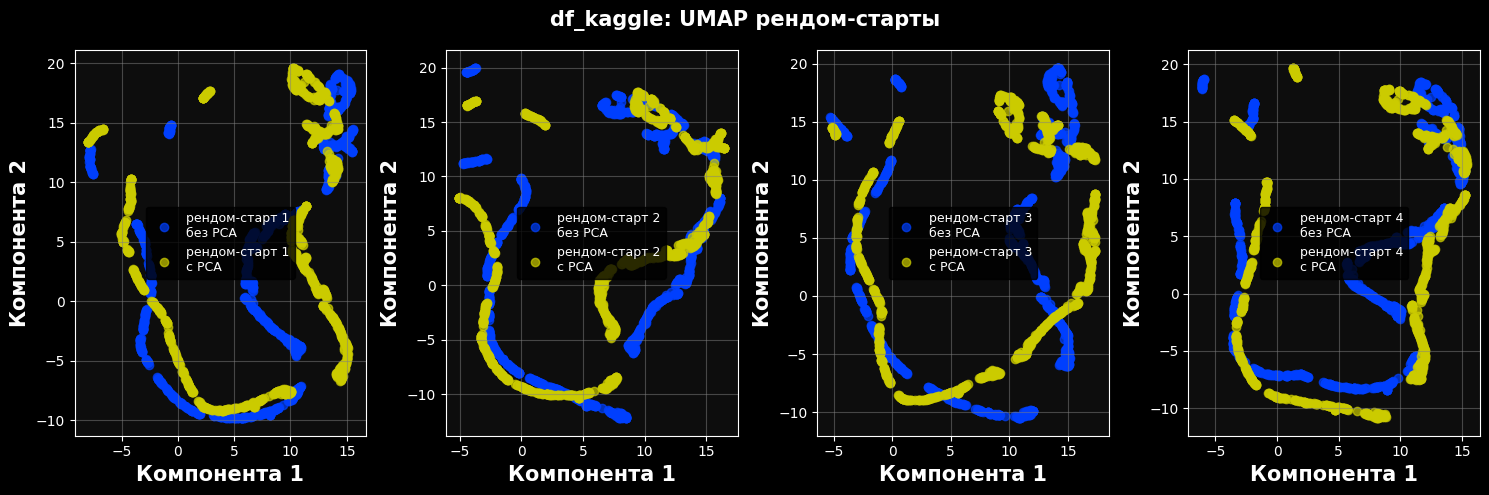

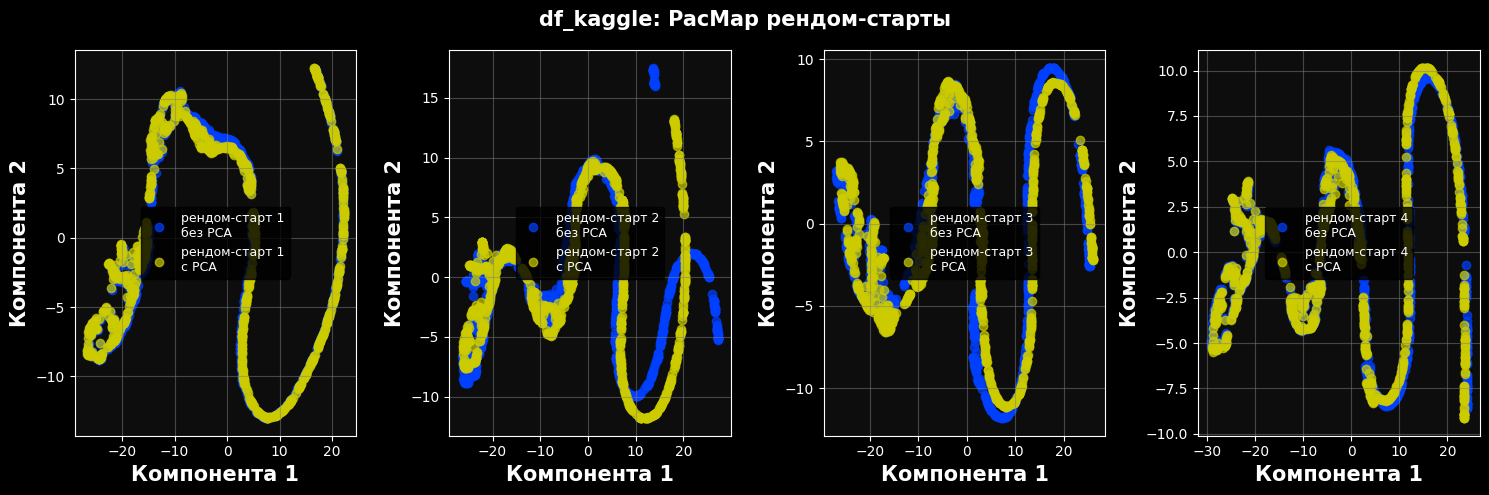

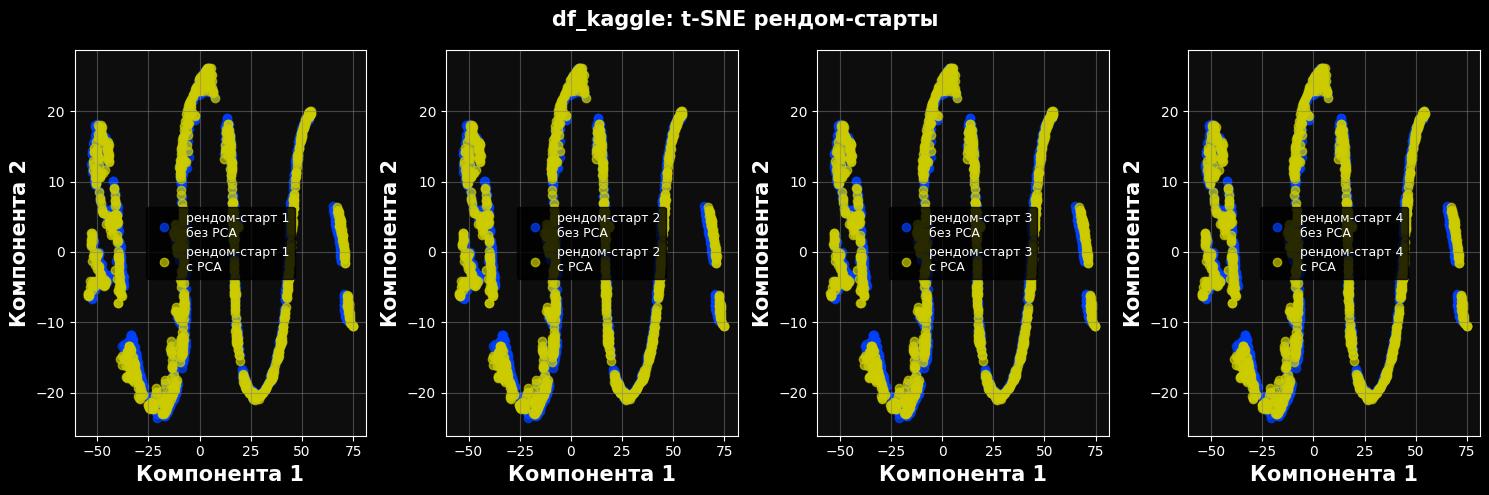

In [87]:
# Применение UMAP, t-SNE и PACMap для нового датасета
umap_random_starts(df_kaggle, dataset_name, n_starts=4)
pacmap_random_starts(df_kaggle, dataset_name, n_starts=4)
tsne_random_starts(df_kaggle, dataset_name, n_starts=4)